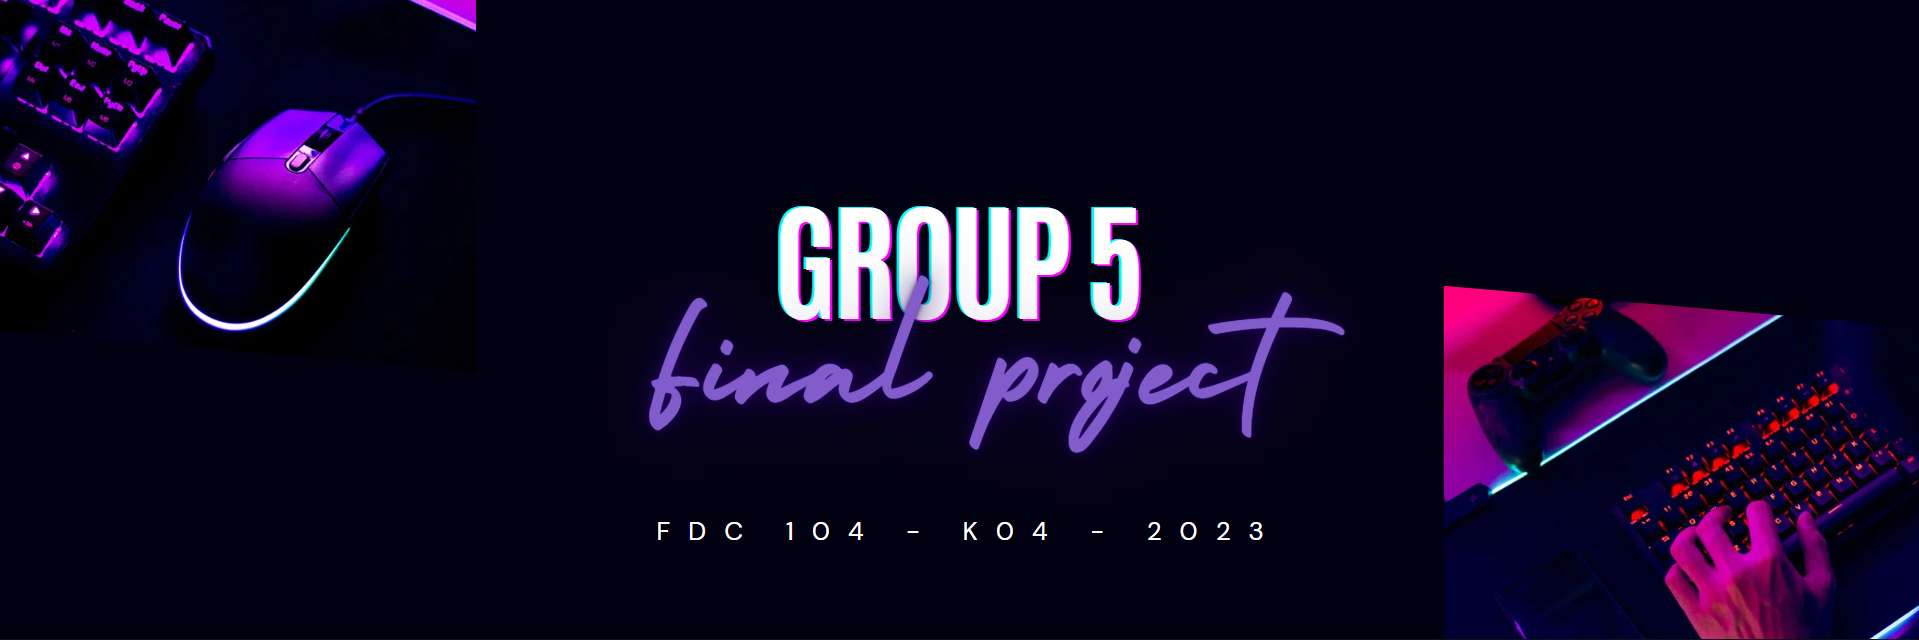


# **Data description**

Ng√†y nay, d·ªãch v·ª• xe ƒë·∫°p cho thu√™ ƒë∆∞·ª£c gi·ªõi thi·ªáu ·ªü nhi·ªÅu th√†nh ph·ªë ƒë√¥ th·ªã ƒë·ªÉ tƒÉng c∆∞·ªùng s·ª± tho·∫£i m√°i khi di chuy·ªÉn. ƒêi·ªÅu quan tr·ªçng l√† ph·∫£i cung c·∫•p d·ªãch v·ª• cho thu√™ xe ƒë·∫°p cho c√¥ng ch√∫ng v√†o ƒë√∫ng th·ªùi ƒëi·ªÉm v√¨ n√≥ gi√∫p gi·∫£m th·ªùi gian ch·ªù ƒë·ª£i. Cu·ªëi c√πng, vi·ªác cung c·∫•p cho th√†nh ph·ªë ngu·ªìn cung c·∫•p xe ƒë·∫°p cho thu√™ ·ªïn ƒë·ªãnh tr·ªü th√†nh m·ªëi quan t√¢m ch√≠nh. Ph·∫ßn quan tr·ªçng l√† d·ª± ƒëo√°n s·ªë l∆∞·ª£ng xe ƒë·∫°p c·∫ßn thi·∫øt m·ªói gi·ªù ƒë·ªÉ c√≥ ngu·ªìn cung c·∫•p xe ƒë·∫°p cho thu√™ ·ªïn ƒë·ªãnh.
B·ªô d·ªØ li·ªáu ch·ª©a th√¥ng tin li√™n quan ƒë·∫øn th·ªùi ti·∫øt (Nhi·ªát ƒë·ªô, ƒê·ªô ·∫©m, T·ªëc ƒë·ªô gi√≥, T·∫ßm nh√¨n, ƒêi·ªÉm s∆∞∆°ng, B·ª©c x·∫° m·∫∑t tr·ªùi, L∆∞·ª£ng tuy·∫øt r∆°i, L∆∞·ª£ng m∆∞a), s·ªë l∆∞·ª£ng xe ƒë·∫°p ƒë∆∞·ª£c thu√™ m·ªói gi·ªù v√† th√¥ng tin ng√†y th√°ng.

üìåAttribute Information:

* üìÜ  Date : year-month-day
* üö≤  Rented Bike count - Count of bikes rented at each hour (output attribute)
* üïí  Hour - Hour of he day
* üå°  Temperature-Temperature in Celsius
* üíß  Humidity - %
* üå¨Ô∏è  Windspeed - m/s
* üëÅÔ∏è  Visibility - 10m
* üå´Ô∏è  Dew point temperature - Celsius
* ‚òÄÔ∏è  Solar radiation - MJ/m2
* üåßÔ∏è  Rainfall - mm
* ‚ùÑÔ∏è  Snowfall - cm
* üå∏  Seasons - Winter, Spring, Summer, Autumn
* ‚õ±Ô∏è  Holiday - Holiday/No holiday
* üè¨  Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

üìåNhi·ªám v·ª•: T·∫°o m√¥ h√¨nh ƒë∆°n gi·∫£n d·ª± b√°o s·ªë l∆∞·ª£ng xe ƒë·∫°p ƒë∆∞·ª£c thu√™



# **Data cleaning**

## **Importing**

In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from scipy import stats
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, StackingRegressor, BaggingRegressor
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV, RandomizedSearchCV
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

In [ ]:
url = "https://github.com/trangmx/fdc104/raw/main/datasets/bike_sharing/Bike_sharing_data.csv"
columns = ['Date','Rented Bike Count','Hour','Temperature(¬∞C)','Humidity(%)','Wind speed (m/s)','Visibility (10m)','Dew point temperature(¬∞C)','Solar Radiation (MJ/m2)','Rainfall(mm)','Snowfall (cm)','Seasons','Holiday','Functioning Day']
df = pd.read_csv(url, encoding='latin-1')
df.head()

Date  Rented Bike Count  Hour  Temperature(¬∞C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(¬∞C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [ ]:
df.dtypes

Date                          object
Rented Bike Count              int64
Hour                           int64
Temperature(¬∞C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(¬∞C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
dtype: object

C√°c ki·ªÉu d·ªØ li·ªáu cho t·ª´ng bi·∫øn ph√π h·ª£p

In [ ]:
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(¬∞C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(¬∞C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

Sau khi ch·∫°y ph∆∞∆°ng th·ª©c isnull, nh√≥m nh·∫≠n th·∫•y d·ªØ li·ªáu kh√¥ng ch·ª©a d·ªØ li·ªáu NULL.

## **Formatting**



In [ ]:
bike_sharing = df.copy()

**`ƒê·∫ßu ti√™n`**, nh√≥m chuy·ªÉn ƒë·ªãnh d·∫°ng c·ªßa Date theo format: NƒÉm-Th√°ng-Ng√†y

In [ ]:
bike_sharing['Date']= pd.to_datetime(bike_sharing['Date'], format='%d/%m/%Y')
bike_sharing

Date  Rented Bike Count  Hour  Temperature(¬∞C)  Humidity(%)  \
0    2017-12-01                254     0             -5.2           37   
1    2017-12-01                204     1             -5.5           38   
2    2017-12-01                173     2             -6.0           39   
3    2017-12-01                107     3             -6.2           40   
4    2017-12-01                 78     4             -6.0           36   
...         ...                ...   ...              ...          ...   
8755 2018-11-30               1003    19              4.2           34   
8756 2018-11-30                764    20              3.4           37   
8757 2018-11-30                694    21              2.6           39   
8758 2018-11-30                712    22              2.1           41   
8759 2018-11-30                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(¬∞C)  \
0                  2.2              2000                      -17.6   
1                  0.8              2000                      -17.6   
2                  1.0              2000                      -17.7   
3                  0.9              2000                      -17.6   
4                  2.3              2000                      -18.6   
...                ...               ...                        ...   
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
0                         0.0           0.0            0.0  Winter   
1                         0.0           0.0            0.0  Winter   
2                         0.0           0.0            0.0  Winter   
3                         0.0           0.0            0.0  Winter   
4                         0.0           0.0            0.0  Winter   
...                       ...           ...            ...     ...   
8755                      0.0           0.0            0.0  Autumn   
8756                      0.0           0.0            0.0  Autumn   
8757                      0.0           0.0            0.0  Autumn   
8758                      0.0           0.0            0.0  Autumn   
8759                      0.0           0.0            0.0  Autumn   

         Holiday Functioning Day  
0     No Holiday             Yes  
1     No Holiday             Yes  
2     No Holiday             Yes  
3     No Holiday             Yes  
4     No Holiday             Yes  
...          ...             ...  
8755  No Holiday             Yes  
8756  No Holiday             Yes  
8757  No Holiday             Yes  
8758  No Holiday             Yes  
8759  No Holiday             Yes  

[8760 rows x 14 columns]

**Ti·∫øp theo**, ch√∫ng m√¨nh th·ª±c hi·ªán chuy·ªÉn c√°c bi·∫øn categorical v·ªÅ c√°c bi·∫øn numeric b·∫±ng c√°ch s·ª≠ d·ª•ng ph∆∞∆°ng th·ª©c getdummies:

In [ ]:
dummy_variable_1 = pd.get_dummies(bike_sharing['Seasons'])
bike_sharing = pd.concat([bike_sharing, dummy_variable_1], axis=1)
bike_sharing.drop("Seasons", axis = 1, inplace=True)

In [ ]:
dummy_variable_2 = pd.get_dummies(bike_sharing["Holiday"])
bike_sharing = pd.concat([bike_sharing, dummy_variable_2], axis=1)
bike_sharing.drop("Holiday", axis = 1, inplace=True)

In [ ]:
dummy_variable_3 = pd.get_dummies(bike_sharing["Functioning Day"])
dummy_variable_3.rename(columns={'Yes':'Func', 'No':'NoFunc'}, inplace=True)
bike_sharing = pd.concat([bike_sharing, dummy_variable_3], axis=1)
bike_sharing.drop("Functioning Day", axis = 1, inplace=True)

# **Exploratory Data Analysis (EDA)**

## **Correlation**

T·∫°i ph·∫ßn n√†y nh√≥m m√¥ t·∫£ correlation (t∆∞∆°ng quan) gi·ªØa c√°c bi·∫øn v√† s·ª≠ d·ª•ng c√°c bi·ªÉu ƒë·ªì ƒë·ªÉ khai ph√° d·ªØ li·ªáu (EDA)

In [ ]:
bike_sharing

Date  Rented Bike Count  Hour  Temperature(¬∞C)  Humidity(%)  \
0    2017-12-01                254     0             -5.2           37   
1    2017-12-01                204     1             -5.5           38   
2    2017-12-01                173     2             -6.0           39   
3    2017-12-01                107     3             -6.2           40   
4    2017-12-01                 78     4             -6.0           36   
...         ...                ...   ...              ...          ...   
8755 2018-11-30               1003    19              4.2           34   
8756 2018-11-30                764    20              3.4           37   
8757 2018-11-30                694    21              2.6           39   
8758 2018-11-30                712    22              2.1           41   
8759 2018-11-30                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(¬∞C)  \
0                  2.2              2000                      -17.6   
1                  0.8              2000                      -17.6   
2                  1.0              2000                      -17.7   
3                  0.9              2000                      -17.6   
4                  2.3              2000                      -18.6   
...                ...               ...                        ...   
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  Autumn  Spring  \
0                         0.0           0.0            0.0       0       0   
1                         0.0           0.0            0.0       0       0   
2                         0.0           0.0            0.0       0       0   
3                         0.0           0.0            0.0       0       0   
4                         0.0           0.0            0.0       0       0   
...                       ...           ...            ...     ...     ...   
8755                      0.0           0.0            0.0       1       0   
8756                      0.0           0.0            0.0       1       0   
8757                      0.0           0.0            0.0       1       0   
8758                      0.0           0.0            0.0       1       0   
8759                      0.0           0.0            0.0       1       0   

      Summer  Winter  No Holiday  NoFunc  Func  
0          0       1           1       0     1  
1          0       1           1       0     1  
2          0       1           1       0     1  
3          0       1           1       0     1  
4          0       1           1       0     1  
...      ...     ...         ...     ...   ...  
8755       0       0           1       0     1  
8756       0       0           1       0     1  
8757       0       0           1       0     1  
8758       0       0           1       0     1  
8759       0       0           1       0     1  

[8760 rows x 18 columns]

Do d·ª± ƒëo√°n bi·∫øn Rented Bike Count n√™n l·ªçc ra correlation c·ªßa bi·∫øn n√†y

In [ ]:
#t√≠nh corr c·ªßa c√°c bi·∫øn v·ªõi bi·∫øn s·ªë xe ƒë·∫°p ƒë√£ thu√™
bike_sharing.corr()['Rented Bike Count'].to_frame().style.background_gradient(cmap='RdPu').format(precision=2)

Nh·∫≠n th·∫•y r·∫±ng bi·∫øn nhi·ªát ƒë·ªô c√≥ correlation v·ªõi bi·∫øn s·ªë xe ƒë·∫°p ƒë∆∞·ª£c thu√™ kh√° t·ªët (0.54). ƒêi·ªÅu n√†y cho th·∫•y, bi·∫øn Temperature c√≥ m·ªëi quan h·ªá m·∫°nh v·ªõi bi·∫øn Rented Bike Count.

**Ti·∫øp theo**, D√πng heatmap ƒë·ªÉ c√≥ m·ªôt s·ª± ƒë√°nh gi√° tr·ª±c quan t·ªët h∆°n

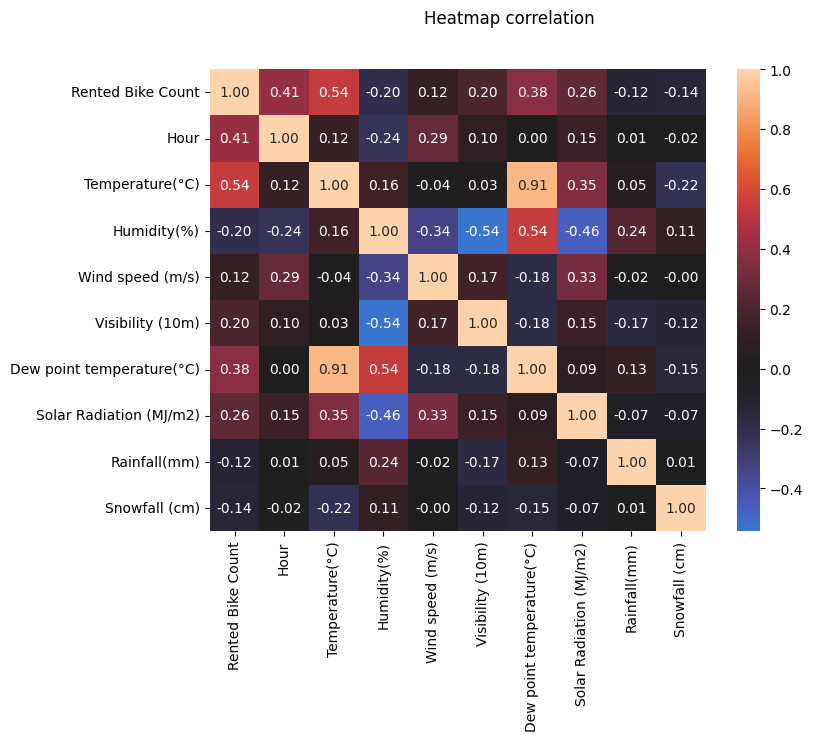

In [ ]:
#heatmap corr
corr=bike_sharing.select_dtypes(include=['float','int']).corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr,annot=True, fmt=".2f", center=0, cmap="icefire")
plt.suptitle('Heatmap correlation')
plt.show()

N·∫øu m·ªôt bi·∫øn trong ƒëo l∆∞·ªùng c√≥ h·ªá s·ªë t∆∞∆°ng quan >=0.3 th√¨ bi·∫øn ƒë√≥ ƒë·∫°t y√™u c·∫ßu (Nunnally & Bernstein, 1994).

L·ªçc correlation **>=0.3 ho·∫∑c <=-0.3** ƒë·ªÉ th·ªÉ hi·ªán c√°c bi·∫øn c√≥ t∆∞∆°ng quan kh√° ch·∫∑t ch·∫Ω

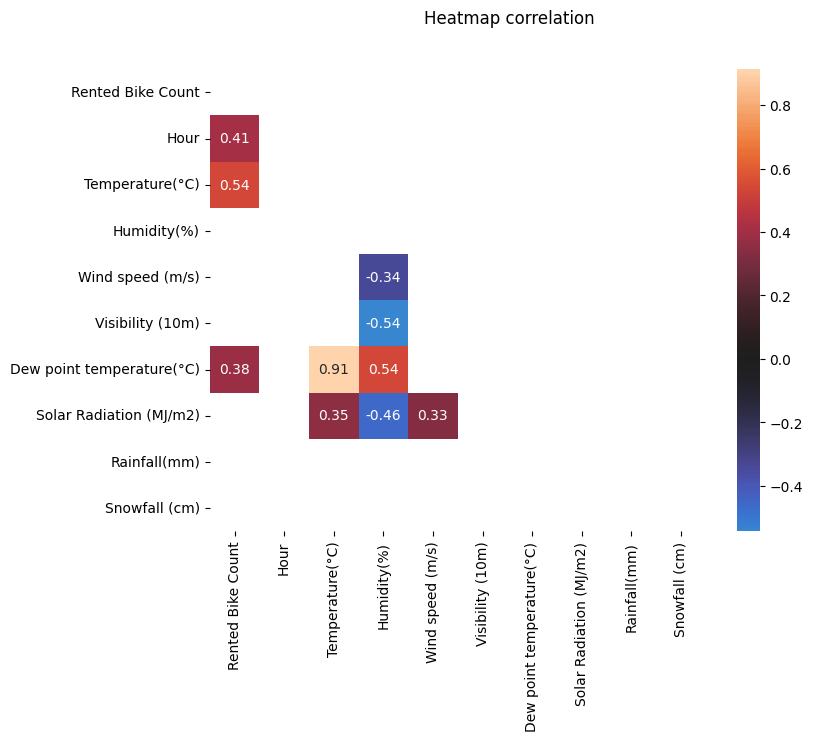

In [ ]:
#heatmap corr ƒë√£ l·ªçc
plt.figure(figsize=(8,6))
sns.heatmap((corr[(corr>=0.3) |(corr <=-0.3)]), mask=np.triu(corr),annot=True,center = 0,cmap="icefire")
plt.suptitle('Heatmap correlation')
plt.show()

**Comment:** H·∫ßu h·∫øt c√°c bi·∫øn c√≥ correlation nh·ªè ch·ª©ng t·ªè c√°c bi·∫øn √≠t ·∫£nh h∆∞·ªüng v·ªõi nhau theo m·ªëi quan h·ªá tuy·∫øn t√≠nh

Ngo·∫°i tr·ª´ c√≥ bi·∫øn nhi·ªát ƒë·ªô c√≥ t∆∞∆°ng quan tuy·∫øn t√≠nh kh√° ch·∫∑t ch·∫Ω t·ªõi s·ªë l∆∞·ª£ng xe ƒë·∫°p ƒë∆∞·ª£c thu√™ (0.54)

Text(0.5, 1.0, 'Rented Bike Count of Temperature')

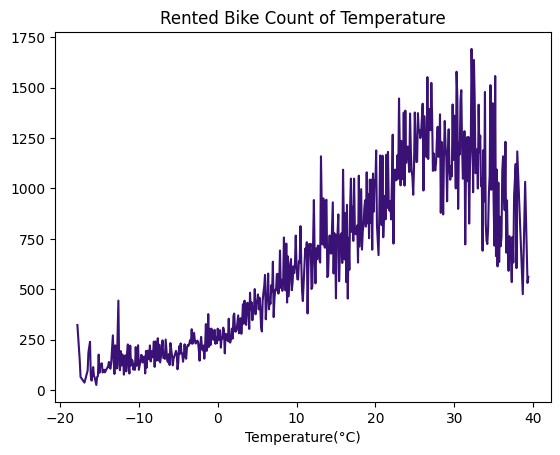

In [ ]:
groupby_temperature=bike_sharing.copy()
groupby_temperature.groupby('Temperature(¬∞C)').mean()['Rented Bike Count'].plot.line(color='#3A1175')
plt.title('Rented Bike Count of Temperature')

**Comment:** s·ªë l∆∞·ª£ng xe ƒë∆∞·ª£c thu√™ tƒÉng khi nhi·ªát ƒë·ªô tƒÉng ƒë·∫°t ƒë·ªânh ·ªü kho·∫£ng 25-30 ƒë·ªô C.

Nh√≥m nh·∫≠n ƒë·ªãnh r·∫±ng ƒë√¢y l√† m·ª©c nhi·ªát ƒë·ªô d·ªÖ ch·ªãu v√† m√°t m·∫ª n√™n m·ªçi ng∆∞·ªùi c√≥ xu h∆∞·ªõng thu√™ xe ƒë·∫°p cao v√† mong mu·ªën th·ªèa m√£n nhu c·∫ßu ƒëi d·∫°o, ƒëi ch∆°i...

**Tuy nhi√™n** , khi nhi·ªát ƒë·ªô qu√° cao (30-40 ƒë·ªô C) th√¨ l∆∞·ª£ng thu√™ xe ƒë·∫°p gi·∫£m do th·ªùi ti·∫øt qu√° n√≥ng v√† m·ªçi ng∆∞·ªùi kh√¥ng c√≥ nhu c·∫ßu ra ngo√†i

## **Descriptive Statistics**

In [ ]:
#m√¥ t·∫£ c√°c bi·∫øn c·ªßa data
bike_sharing.describe()

Rented Bike Count         Hour  Temperature(¬∞C)  Humidity(%)  \
count        8760.000000  8760.000000      8760.000000  8760.000000   
mean          704.602055    11.500000        12.882922    58.226256   
std           644.997468     6.922582        11.944825    20.362413   
min             0.000000     0.000000       -17.800000     0.000000   
25%           191.000000     5.750000         3.500000    42.000000   
50%           504.500000    11.500000        13.700000    57.000000   
75%          1065.250000    17.250000        22.500000    74.000000   
max          3556.000000    23.000000        39.400000    98.000000   

       Wind speed (m/s)  Visibility (10m)  Dew point temperature(¬∞C)  \
count       8760.000000       8760.000000                8760.000000   
mean           1.724909       1436.825799                   4.073813   
std            1.036300        608.298712                  13.060369   
min            0.000000         27.000000                 -30.600000   
25%            0.900000        940.000000                  -4.700000   
50%            1.500000       1698.000000                   5.100000   
75%            2.300000       2000.000000                  14.800000   
max            7.400000       2000.000000                  27.200000   

       Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)       Autumn  \
count              8760.000000   8760.000000    8760.000000  8760.000000   
mean                  0.569111      0.148687       0.075068     0.249315   
std                   0.868746      1.128193       0.436746     0.432641   
min                   0.000000      0.000000       0.000000     0.000000   
25%                   0.000000      0.000000       0.000000     0.000000   
50%                   0.010000      0.000000       0.000000     0.000000   
75%                   0.930000      0.000000       0.000000     0.000000   
max                   3.520000     35.000000       8.800000     1.000000   

            Spring       Summer       Winter   No Holiday       NoFunc  \
count  8760.000000  8760.000000  8760.000000  8760.000000  8760.000000   
mean      0.252055     0.252055     0.246575     0.950685     0.033676   
std       0.434217     0.434217     0.431042     0.216537     0.180404   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     1.000000     0.000000   
50%       0.000000     0.000000     0.000000     1.000000     0.000000   
75%       1.000000     1.000000     0.000000     1.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

              Func  
count  8760.000000  
mean      0.966324  
std       0.180404  
min       0.000000  
25%       1.000000  
50%       1.000000  
75%       1.000000  
max       1.000000

**Comment:** 3 bi·∫øn **Solar Radiation, Rainfall, Snowfall** c√≥ mean th·∫•p, 25%, 50% g·∫ßn nh∆∞ s·∫•p x·ªâ kh√¥ng.

ƒêi·ªÅu n√†y ch·ª©ng t·ªè r·∫±ng d·ªØ li·ªáu ƒë∆∞·ª£c l·∫•y t·ª´ khu v·ª±c c√≥ th·ªùi ti·∫øt kh√° t·ªët: b·ª©c x·∫° m·∫∑t tr·ªùi (kh√¥ng n·∫Øng g·∫Øt), m∆∞a v√† tuy·∫øt b·∫±ng 0 ho·∫∑c s·∫•p x·ªâ b·∫±ng kh√¥ng (m·ª©c ƒë·ªô nh·∫π).

Nhi·ªát ƒë·ªô trung b√¨nh kho·∫£ng 13 ƒë·ªô C c√≥ th·ªÉ d·ªØ li·ªáu ƒë∆∞·ª£c l·∫•y t·ª´ v√πng c√≥ kh√≠ h·∫≠u √¥n h√≤a

ƒê·ªÉ t√¨m hi·ªÉu r√µ h∆°n v·ªÅ ƒëi·ªÅu n√†y ch√∫ng ta c·∫ßn t√¨m hi·ªÉu v·ªÅ s·ªë l∆∞·ª£ng t·ª´ng bi·∫øn

In [ ]:
bike_sharing['Snowfall (cm)'].value_counts().head(10).to_frame()

Snowfall (cm)
0.0           8317
0.3             42
1.0             39
0.9             34
0.5             34
0.7             31
0.8             22
2.0             22
0.4             21
1.6             19

In [ ]:

bike_sharing[['Solar Radiation (MJ/m2)']].value_counts().to_frame()

0
Solar Radiation (MJ/m2)      
0.00                     4300
0.01                      128
0.02                       82
0.03                       69
0.06                       61
...                       ...
3.38                        1
2.97                        1
3.44                        1
3.45                        1
3.49                        1

[345 rows x 1 columns]

In [ ]:

bike_sharing[[ 'Rainfall(mm)']].value_counts().to_frame()

0
Rainfall(mm)      
0.0           8232
0.5            116
1.0             66
1.5             56
0.1             46
...            ...
2.4              1
1.3              1
1.9              1
1.8              1
35.0             1

[61 rows x 1 columns]

**Comment**: C√≥ th·ªÉ th·∫•y r·∫±ng r√µ r√†ng r·∫±ng h∆°n 90% d·ªØ li·ªáu l√† kh√¥ng m∆∞a, kh√¥ng c√≥ tuy·∫øt r∆°i v√† 50% d·ªØ li·ªáu l√† tr·ªùi kh√¥ng n·∫Øng, n·∫øu c√≥ n·∫Øng th√¨ l∆∞·ª£ng b·ª©c x·∫° c≈©ng ·ªü m·ª©c ƒë·ªô nh·∫π. Ch·ª©ng t·ªè r√µ r√†ng r·∫±ng th·ªùi thi·∫øt ·ªü khu v·ª±c n√†y d·ªÖ ch·ªãu v√† √≠t c√≥ th·ªùi ti·∫øt x·∫•u b·∫•t th∆∞·ªùng x·∫£y ra

**Ti·∫øp theo,** nh√≥m s·ª≠ d·ª•ng bi·ªÉu ƒë·ªì c·ªôt k·∫øt h·ª£p line ƒë·ªÉ bi·ªÉu th·ªã ph√¢n b·ªï s·ªë l∆∞·ª£ng c·ªßa t·ª´ng bi·∫øn. Qua ƒë√≥ c√≥ ƒë∆∞·ª£c m·ªôt g√≥c nh√¨n t·ªïng quan v·ªÅ t·ª´ng bi·∫øn trong b·ªô d·ªØ li·ªáu

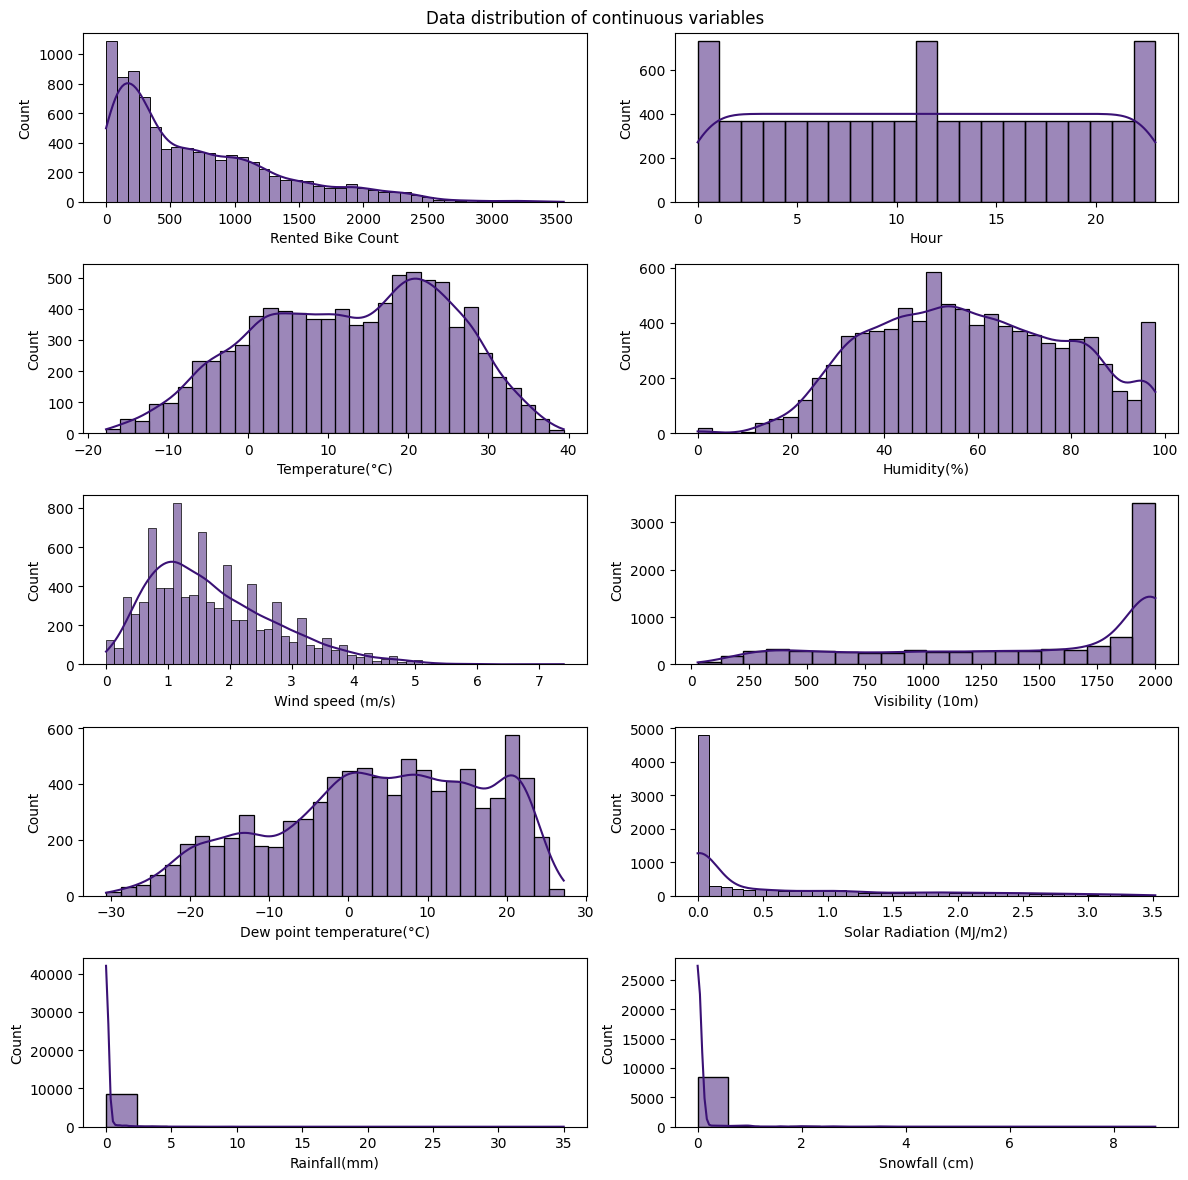

In [ ]:
#count t·ª´ng bi·∫øn
plt.figure(figsize=(12, 12))
for i, col in enumerate(bike_sharing.select_dtypes(include=['float64','int64']).columns):
    plt.rcParams['axes.facecolor'] = 'white'
    ax = plt.subplot(5,2, i+1)
    sns.histplot(data=bike_sharing, x=col, ax=ax,color='#3A1175',kde=True)
plt.suptitle('Data distribution of continuous variables')
plt.tight_layout()

**Comment:** T·ªïng quan d·ªØ li·ªáu th·∫•y ƒë∆∞·ª£c r·∫±ng nhi·ªát ƒë·ªô c·ªßa khu v·ª±c thu nh·∫≠p d·ªØ li·ªáu v√†o 20 ƒë·ªô C, ƒë·ªô ·∫©m trung b√¨nh kho·∫£ng 40-80%, t·ªëc ƒë·ªô gi√≥ trung b√¨nh kho·∫£ng 1m/s.
Solar Radiation r·∫•t th·∫•p th·∫•y ƒë∆∞·ª£c r·∫±ng khu v·ª±c n√†y kh√¥ng c√≥ nhi·ªÅu ng√†y n·∫Øng m·∫°nh
Rainfall, Snowfall g·∫ßn nh∆∞ b·∫±ng 0 ch·ª©ng t·ªè r·∫±ng th·ªùi ti·∫øt khu v·ª±c n√†y kh√° t·ªët, r·∫•t √≠t khi g·∫∑p th·ªùi ti·∫øt x·∫•u nh∆∞ m∆∞a, tuy·∫øt.



Ti·∫øp theo, nh√≥m s·ª≠ d·ª•ng bi·ªÉu ƒë·ªì d·∫°ng c·ªôt theo bi·∫øn th·ªùi gian ƒë·ªÉ th·∫•y ƒë∆∞·ª£c s·ª± ph·ª• thu·ªôc c·ªßa t·ª´ng bi·∫øn theo th·ªùi gian

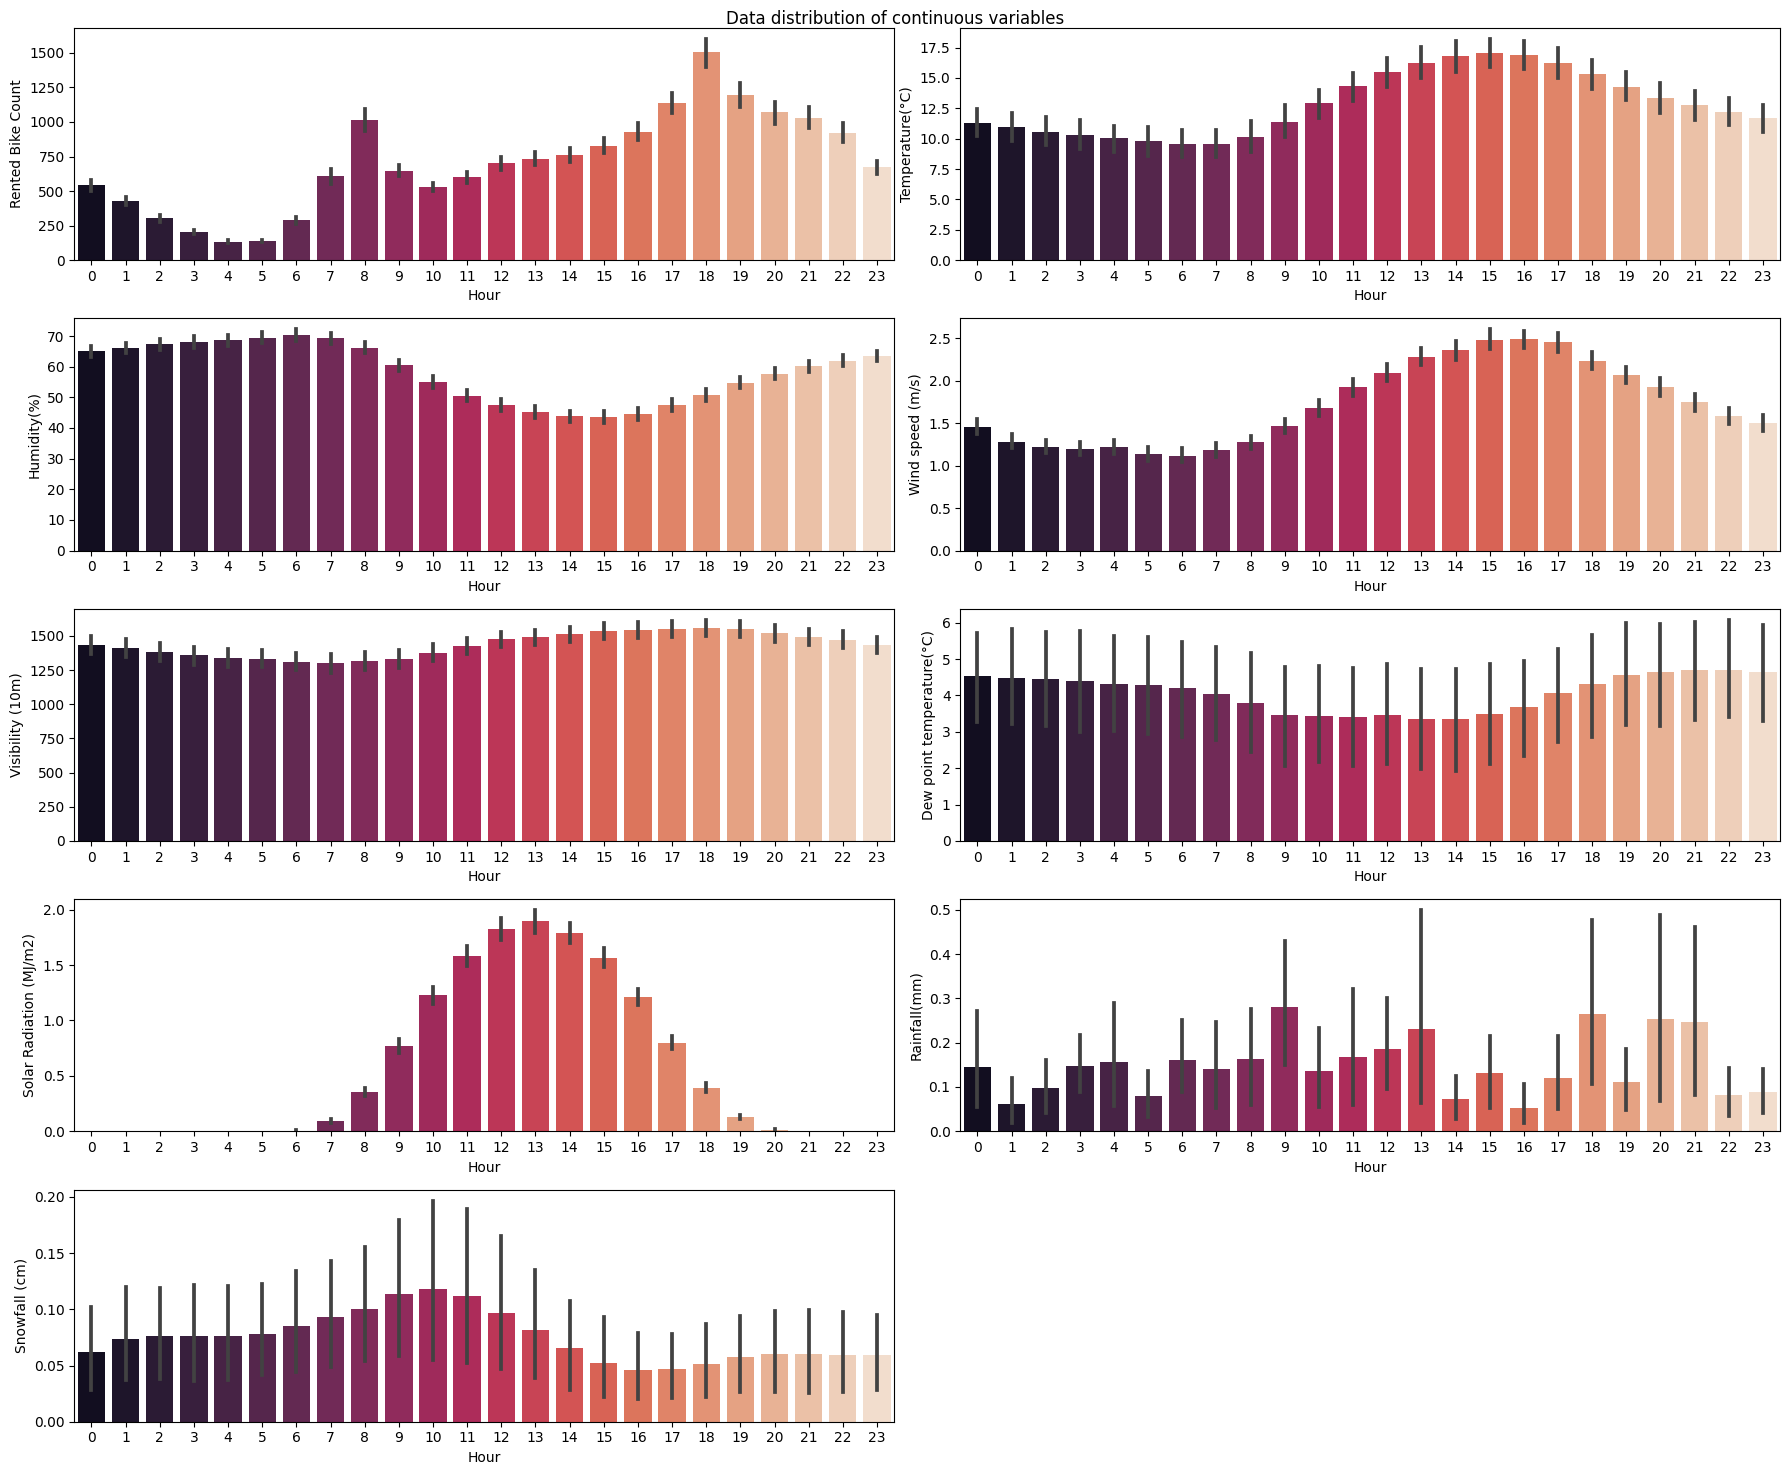

In [ ]:
#bi·ªÉu ƒë·ªì theo th·ªùi gian t·ª´ng bi·∫øn
plt.figure(figsize=(18, 15))
for i, col in enumerate(df.select_dtypes(include=['float64','int']).columns):
    plt.rcParams['axes.facecolor'] = 'white'
    ax = plt.subplot(5,2, i+1)
    sns.barplot(data=df,x='Hour', y=col, ax=ax, palette = 'rocket')
plt.suptitle('Data distribution of continuous variables')
plt.tight_layout()

**Comment:** L∆∞·ª£ng thu√™ xe cao ƒëi·ªÉm v√†o 18h, ƒë√¢y c≈©ng l√† l√∫c sau th·ªùi ƒëi·ªÉm nhi·ªát ƒë·ªô cao nh·∫•t trong ng√†y, l√∫c n√†y nhi·ªát ƒë·ªô ƒë√£ gi·∫£m v√† tr·ªùi ƒë√£ h·∫øt n·∫Øng g·∫Øt (Solar Radiation th·∫•p) n√™n c√≥ th·ªÉ d·ª± ƒëo√°n r·∫±ng ƒë√¢y l√† l√∫c th·ªùi ti·∫øt m√°t m·∫ª v√† d·ªÖ ch·ªãu n√™n s·ªë l∆∞·ª£ng thu√™ xe cao nh·∫•t trong ng√†y

Nh·ªØng pie chart b√™n d∆∞·ªõi ch·ª©ng t·ªè r·∫±ng d·ªØ li·ªáu c√¢n b·∫±ng (balanced)

In [ ]:
season_var=pd.crosstab(index=df['Seasons'],columns='% observations')
season_var

col_0    % observations
Seasons                
Autumn             2184
Spring             2208
Summer             2208
Winter             2160

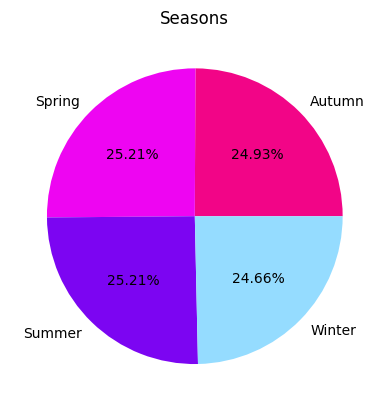

In [ ]:
#pie chart c·ªßa season
a = ['#F20587','#EE05F2','#7C05F2','#95DCFF']
plt.pie(season_var['% observations'],labels=season_var['% observations'].index,autopct='%.2f%%', colors = a)
plt.title('Seasons')
plt.show()

S·ªë l∆∞·ª£ng d·ªØ li·ªáu c√°c m√πa ƒë·ªÅu nhau ch·ª©ng t·ªè d·ªØ li·ªáu ƒë∆∞·ª£c thu th·∫≠p ƒë·ªß qua 4 m√πa

Text(0.5, 1.0, 'Rented Bike Count in Seasons')

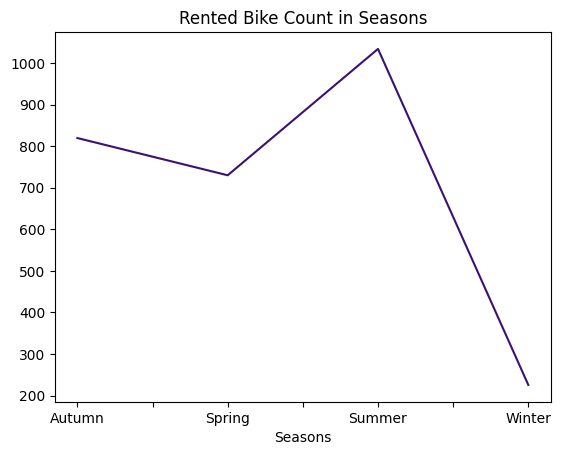

In [ ]:
groupby_seasons=df.copy()
groupby_seasons.groupby('Seasons').mean()['Rented Bike Count'].plot.line(color='#3A1175')
plt.title('Rented Bike Count in Seasons')

**Comment:** L∆∞·ª£ng xe ƒë·∫°p ƒë∆∞·ª£c thu√™ tƒÉng cao v√†o m√πa h·∫° v√† gi·∫£m v√†o m√πa ƒë√¥ng. Do ƒë√≥ c√≥ th·ªÉ nh·∫≠n ƒë·ªãnh r·∫±ng m·ªçi ng∆∞·ªùi c√≥ xu h∆∞·ªõng ra ngo√†i b·∫±ng xe ƒë·∫°p v√†o m√πa h·∫° do th·ªùi ti·∫øt n√≥ng h∆°n l√† m√πa ƒë√¥ng trong th·ªùi ti·∫øt l·∫°nh

In [ ]:
df['Functioning Day'].value_counts().to_frame()

Functioning Day
Yes             8465
No               295

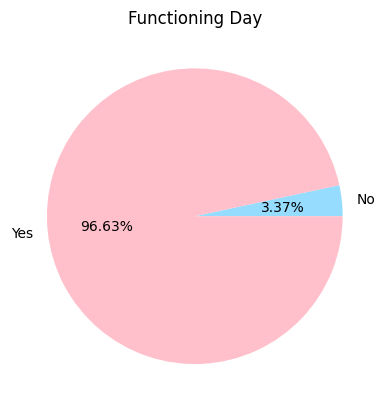

In [ ]:
#pie chart c·ªßa functioning day

Functioning_Day_var=pd.crosstab(index=df['Functioning Day'],columns='% observations')
plt.pie(Functioning_Day_var['% observations'],labels=Functioning_Day_var['% observations'].index,autopct='%.2f%%', colors = ['#95DCFF','pink'])
plt.title('Functioning Day')
plt.show()

In [ ]:
groupby_fd=df.copy()
fd = pd.DataFrame(groupby_holiday.groupby('Functioning Day')['Rented Bike Count'].mean().sort_values(ascending=False))
fd.style.background_gradient(cmap=sns.light_palette('pink',as_cmap=True))

In [ ]:
df['Holiday'].value_counts().to_frame()

Holiday
No Holiday     8328
Holiday         432

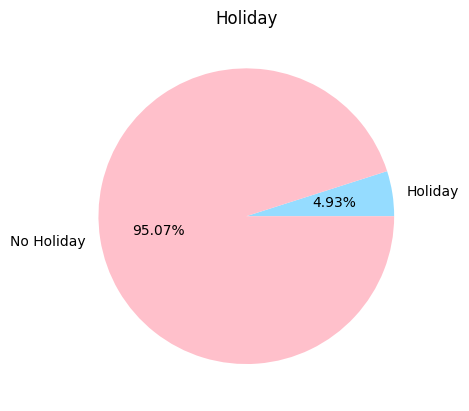

In [ ]:
#pie chart c·ªßa holiday
holiday_var=pd.crosstab(index=df['Holiday'],columns='% observations')
plt.pie(holiday_var['% observations'],labels=holiday_var['% observations'].index,autopct='%.2f%%',colors = ['#95DCFF','pink'])
plt.title('Holiday')
plt.show()

In [ ]:
groupby_holiday=df.copy()
holiday1 = pd.DataFrame(groupby_holiday.groupby('Holiday')['Rented Bike Count'].mean().sort_values(ascending=False))
holiday1.style.background_gradient(cmap=sns.light_palette('pink',as_cmap=True))

Text(0.5, 1.0, 'Rented Bike Count in Holiday')

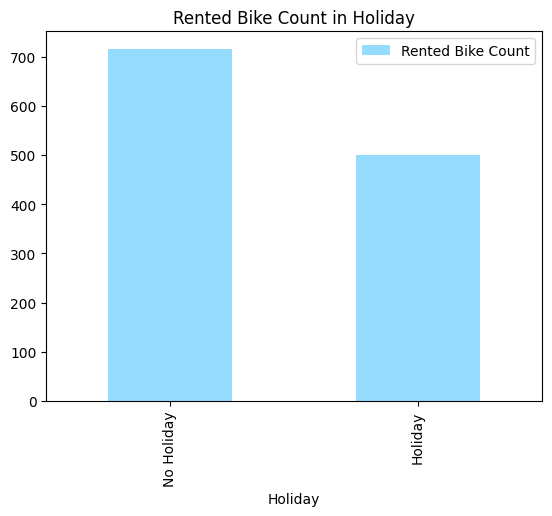

In [ ]:
holiday1.plot.bar(color = ['#95DCFF','pink'])
plt.title('Rented Bike Count in Holiday')

**Comment**: L∆∞·ª£ng thu√™ xe ng√†y th∆∞·ªùng cao h∆°n ng√†y ngh·ªâ l·ªÖ c√≥ th·ªÉ l√† do m·ªçi ng∆∞·ªùi kh√¥ng th√≠ch ra ngo√†i ng√†y l·ªÖ v√† mu·ªën t·∫≠n h∆∞·ªüng ng√†y ngh·ªâ l·ªÖ b√™n c·∫°nh b·∫°n b√®, ng∆∞·ªùi th√¢n.

## **Reduce Outliers**

·ªû ph·∫ßn ti·∫øp theo nh√≥m s·ª≠ d·ª•ng boxplot ƒë·ªÉ bi·ªÉu th·ªã t·ª´ng bi·∫øn v√† x√°c ƒë·ªãnh outlier ƒë·ªÉ c√≥ c√°ch x·ª≠ l√Ω ph√π h·ª£p ·ªü c√°c b∆∞·ªõc ti·∫øp theo

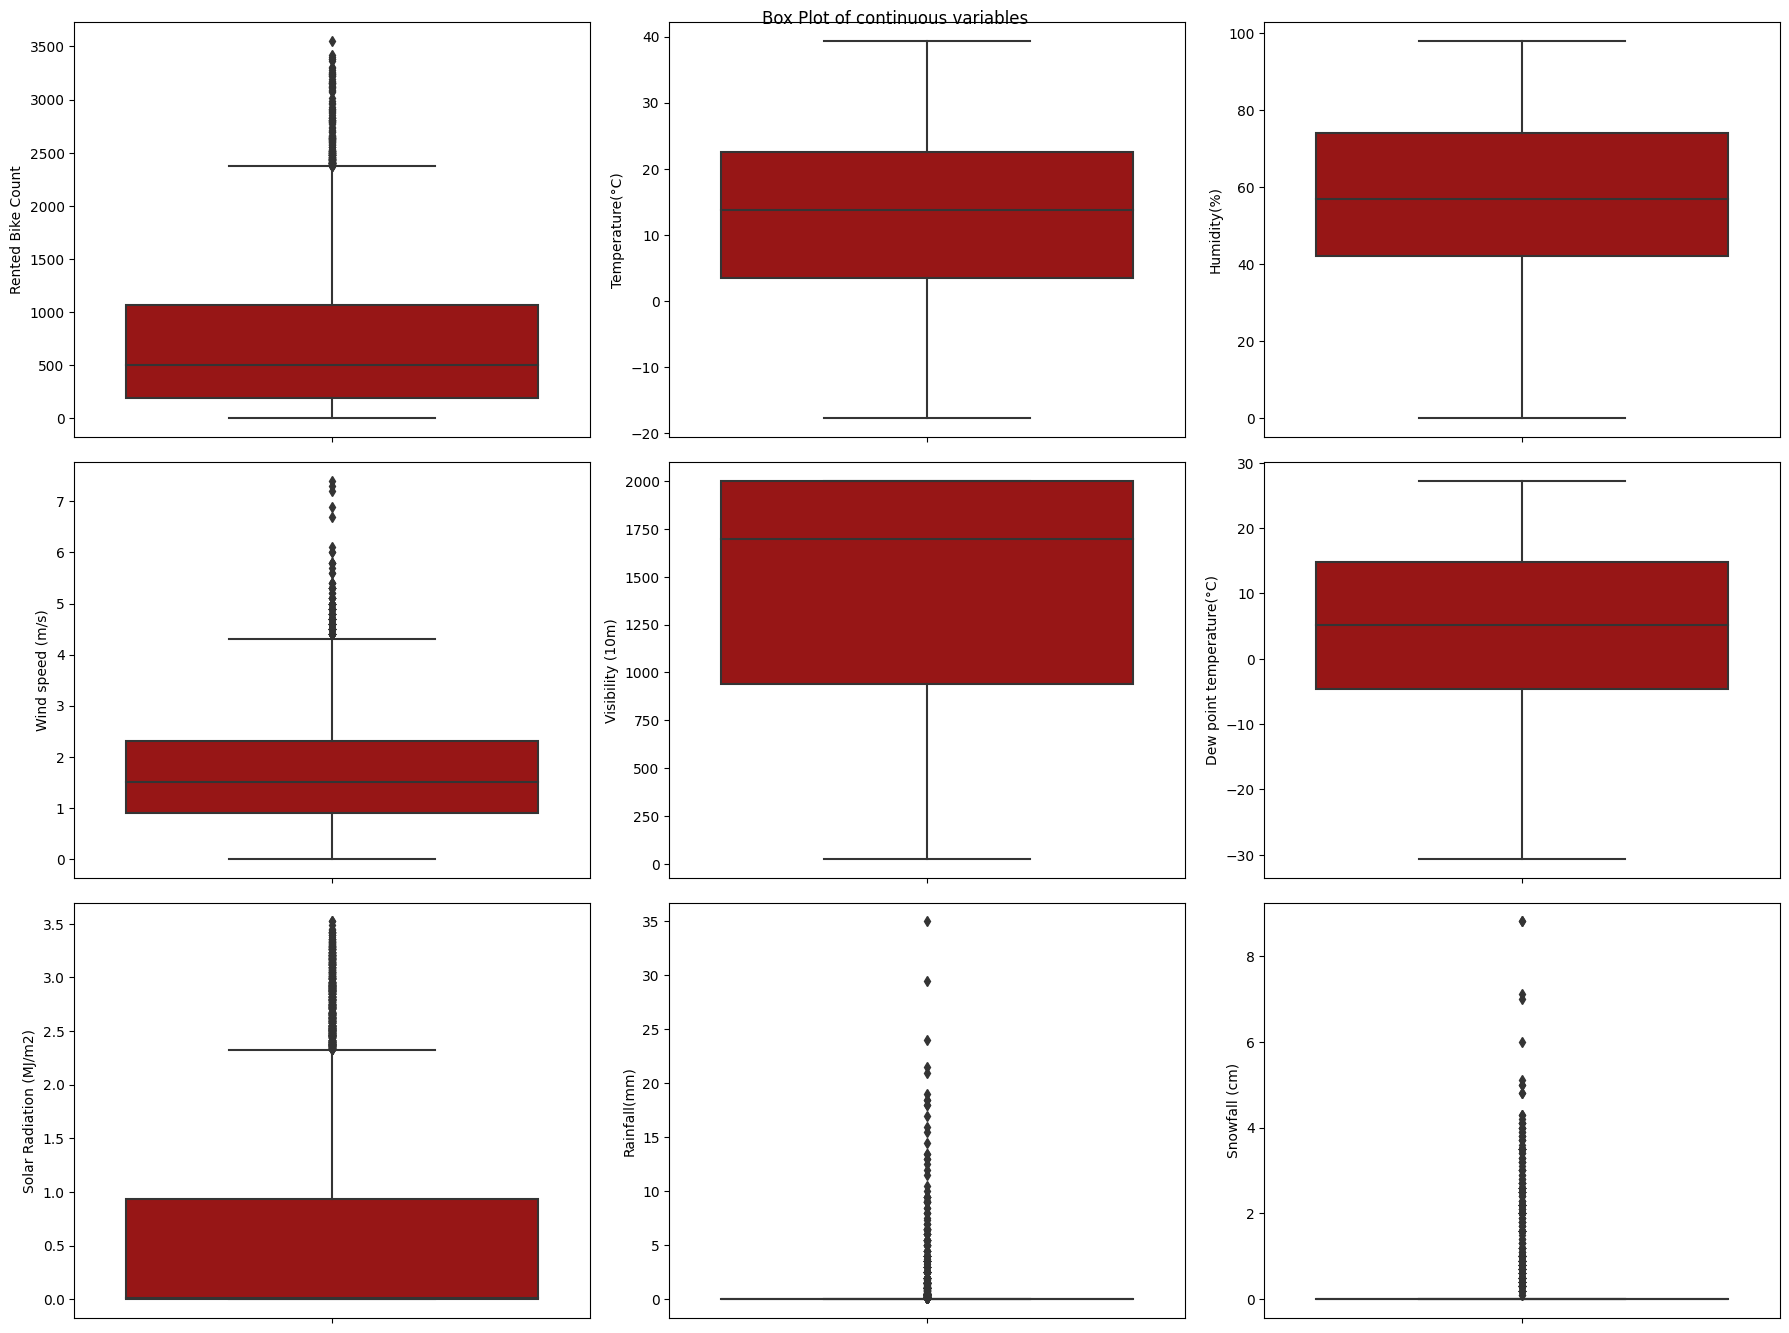

In [ ]:
#box plot c·ªßa c√°c bi·∫øn
plt.figure(figsize=(18, 18))
for i, col in enumerate(bike_sharing.select_dtypes(include=['float64','int64']).columns):
    plt.rcParams['axes.facecolor'] = 'white'
    ax = plt.subplot(4,3, i+1)
    sns.boxplot(data=bike_sharing, y=col, ax=ax,color='#AC0000')
plt.suptitle('Box Plot of continuous variables')
plt.tight_layout()
plt.show()

ƒê·ªãnh nghƒ©a h√†m remove_outliers ƒë·ªÉ lo·∫°i b·ªè c√°c outlier

In [ ]:
def remove_outliers(df: pd.DataFrame, feat: str):
    """
    """
    feat_fraud = df[feat].values
    q25, q75 = np.percentile(feat_fraud, 25), np.percentile(feat_fraud, 75)
    iqr = q75 -q25

    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off

    outliers = [x for x in feat_fraud if x < lower or x > upper]
    print(f'Feature {feat} Outliers for Fraud Cases: {len(outliers)}')

    return df.drop(df[(bike_sharing[feat] > upper) | (df[feat] < lower)].index)

In [ ]:
for i in bike_sharing.select_dtypes(include=['float64','int64']).columns:
  bike_sharing=remove_outliers(bike_sharing,i)

Feature Rented Bike Count Outliers for Fraud Cases: 158
Feature Temperature(¬∞C) Outliers for Fraud Cases: 0
Feature Humidity(%) Outliers for Fraud Cases: 0
Feature Wind speed (m/s) Outliers for Fraud Cases: 161
Feature Visibility (10m) Outliers for Fraud Cases: 0
Feature Dew point temperature(¬∞C) Outliers for Fraud Cases: 0
Feature Solar Radiation (MJ/m2) Outliers for Fraud Cases: 681
Feature Rainfall(mm) Outliers for Fraud Cases: 512
Feature Snowfall (cm) Outliers for Fraud Cases: 398


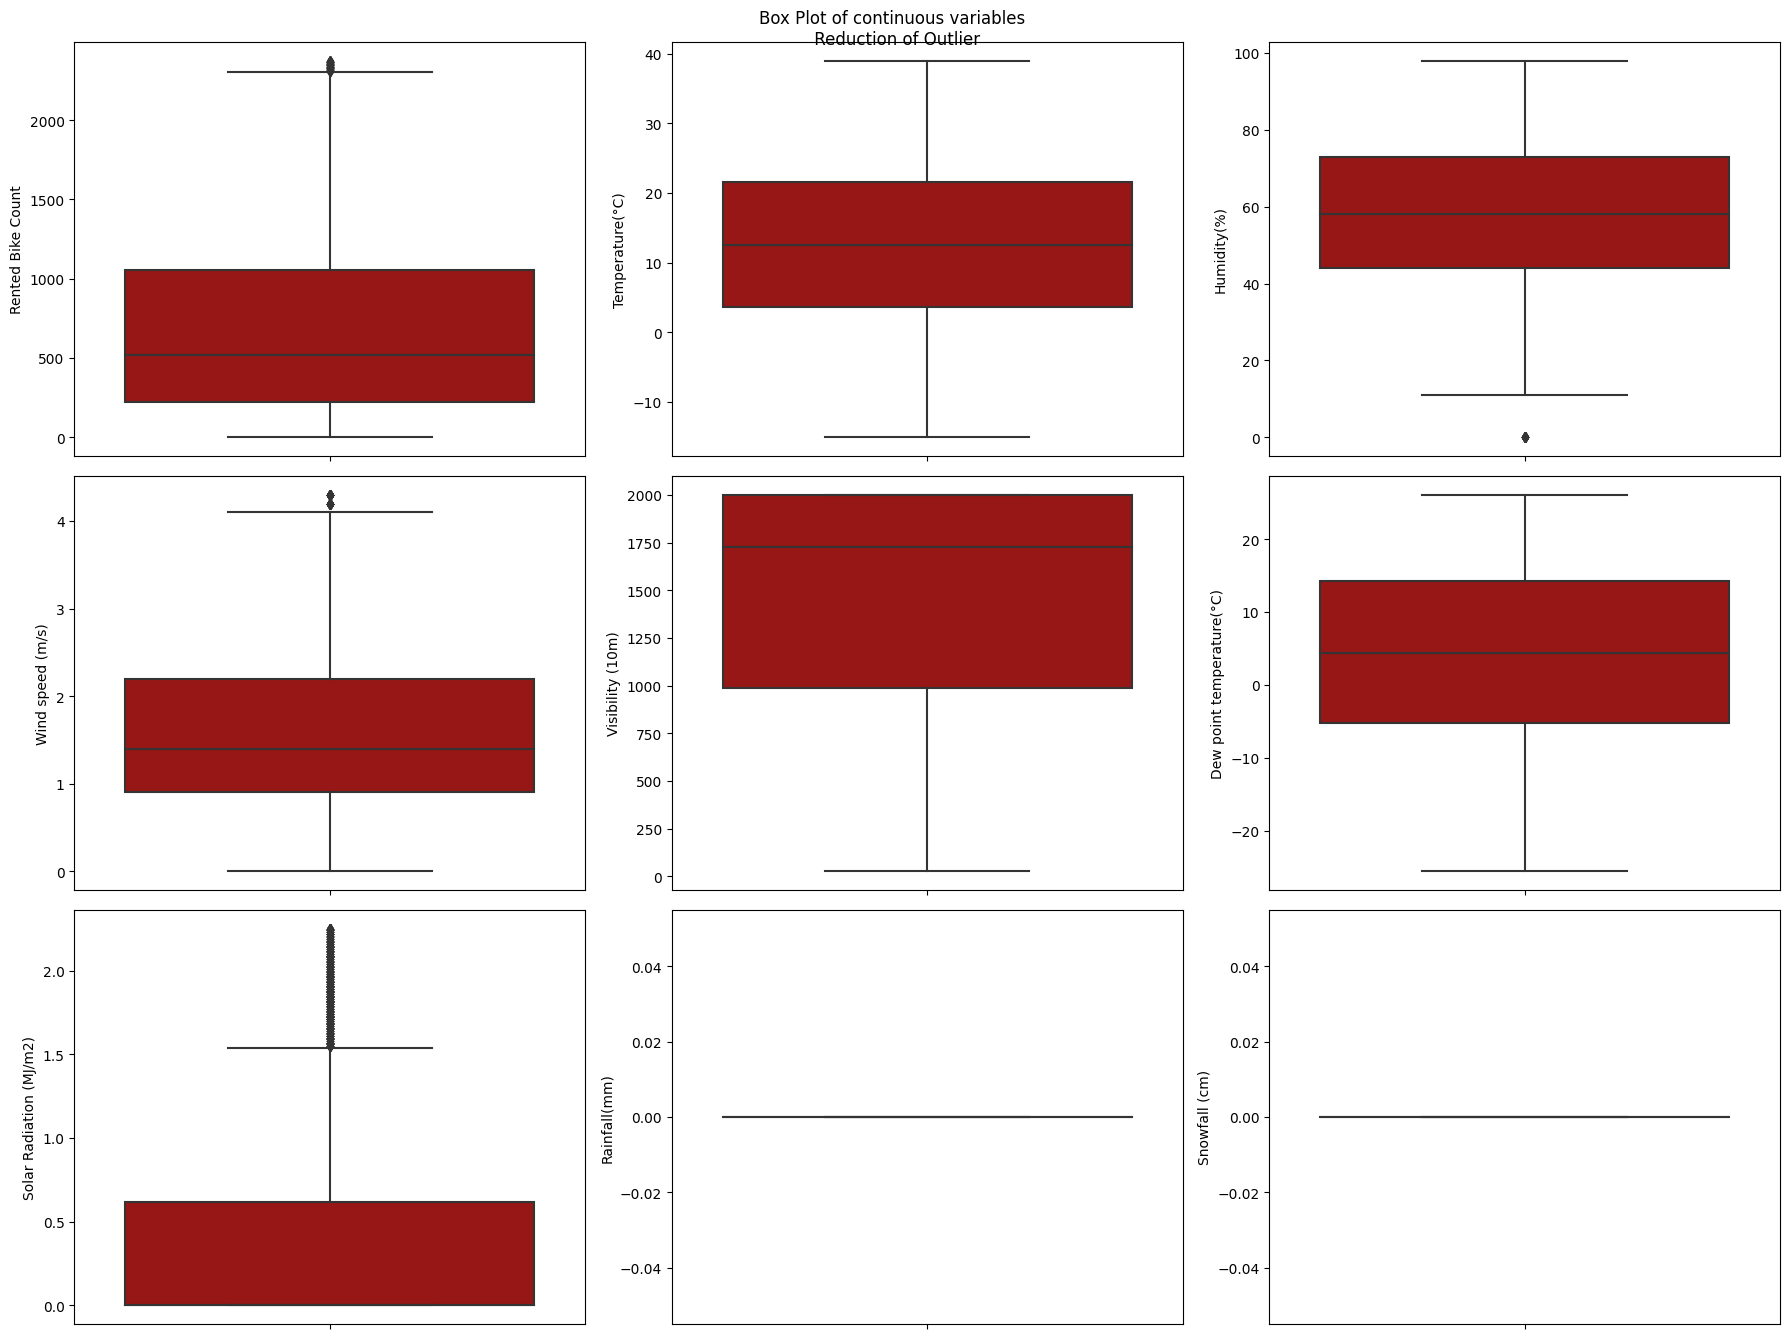

In [ ]:
#box plot c·ªßa c√°c bi·∫øn sau khi ƒë√£ l·ªçc outlier
plt.figure(figsize=(18, 18))
for i, col in enumerate(bike_sharing.select_dtypes(include=['float64','int64']).columns):
    plt.rcParams['axes.facecolor'] = 'white'
    ax = plt.subplot(4,3, i+1)
    sns.boxplot(data=bike_sharing, y=col, ax=ax,color='#AC0000')
plt.suptitle('Box Plot of continuous variables \n Reduction of Outlier')
plt.tight_layout()
plt.show()

## **Identify important variable**

T·∫°i ph·∫ßn n√†y nh√≥m x√°c ƒë·ªãnh bi·∫øn quan tr·ªçng b·∫±ng ch·ªâ s·ªë The Pearson Correlation Coefficient v√† P-value

In [ ]:
bike_sharing.shape[1]

18

In [ ]:
for i in range(2,18):
    pearson_coef, p_value = stats.pearsonr(bike_eda[bike_eda.columns[i]], bike_eda['Rented Bike Count'])
    print(f"The Pearson Correlation Coefficient - {bike_eda.columns[i]} is", pearson_coef, " with a P-value of P =", p_value,
          '\n', '---------')

The Pearson Correlation Coefficient - Hour is 0.42807018328197183  with a P-value of P = 2.2716756511592417e-303 
 ---------
The Pearson Correlation Coefficient - Temperature(¬∞C) is 0.5570934161995496  with a P-value of P = 0.0 
 ---------
The Pearson Correlation Coefficient - Humidity(%) is -0.08054505912239858  with a P-value of P = 2.4568354835370756e-11 
 ---------
The Pearson Correlation Coefficient - Wind speed (m/s) is 0.12453553488556443  with a P-value of P = 4.3832514704279945e-25 
 ---------
The Pearson Correlation Coefficient - Visibility (10m) is 0.1351573621392546  with a P-value of P = 2.7198781224152047e-29 
 ---------
The Pearson Correlation Coefficient - Dew point temperature(¬∞C) is 0.43070101348795203  with a P-value of P = 1.7164698598042998e-307 
 ---------
The Pearson Correlation Coefficient - Solar Radiation (MJ/m2) is 0.2260288139544993  with a P-value of P = 4.4546887611880166e-80 
 ---------
The Pearson Correlation Coefficient - Rainfall(mm) is nan  with a P

C√°c bi·∫øn c√≥ ch·ªâ s·ªë Correlation kh√¥ng g·∫ßn 0 v√† c√≥ P-value < 0.05 n√™n c√°c bi·∫øn ƒë·ªÅu quan tr·ªçng v√† nh√≥m s·ª≠ d·ª•ng t·∫•t c·∫£ c√°c bi·∫øn ƒë·ªÉ ph√°t tri·ªÉn model v√¨ kh√¥ng mu·ªën b·ªè x√≥t bi·∫øn khi·∫øn m√¥ h√¨nh tr·ªü n√™n kh√¥ng ch√≠nh x√°c

# **Model Development**

1. Nh√≥m 5 s·ª≠ d·ª•ng h√†m train_test_split ƒë·ªÉ chia d·ªØ li·ªáu th√†nh t·∫≠p train1 v√† test ban ƒë·∫ßu ƒë·ªÉ th·ª±c hi·ªán chu·∫©n h√≥a d·ªØ li·ªáu tr√™n t·ª´ng ph·∫ßn m·ªôt.

2. Ti·∫øp theo, nh√≥m s·ª≠ d·ª•ng l·∫°i h√†m train_test_split ƒë·ªÉ chia t·∫≠p train1 th√†nh t·∫≠p train v√† validation, v·ªõi t·ª∑ l·ªá 75% cho train v√† 25% cho validation trong 80% ban ƒë·∫ßu.
<br>
- Train1: 0.8 (=Train + Eval)

- Train: 0.8 * 0.75 = 0.6

- Val: 0.8 * 0.25 = 0.2

- Test: 0.2
<br>
3. Sau ƒë√≥, nh√≥m kh·ªüi t·∫°o m·ªôt m√¥ h√¨nh v√† s·ª≠ d·ª•ng ph∆∞∆°ng th·ª©c fit ƒë·ªÉ hu·∫•n luy·ªán m√¥ h√¨nh tr√™n t·∫≠p train.
4. Tunning:
- ƒê√°nh gi√° m√¥ h√¨nh tr√™n t·∫≠p val s·ª≠ d·ª•ng RMSE l√†m thang ƒëo v√† ch·ªçn hyperpagram t·ªët nh·∫•t.
- RMSE (Root Mean Square Error) l√† m·ªôt ƒë·ªô ƒëo l·ªói ph·ªï bi·∫øn ƒë∆∞·ª£c s·ª≠ d·ª•ng ƒë·ªÉ ƒë√°nh gi√° m√¥ h√¨nh d·ª± b√°o. N√≥ ƒëo l∆∞·ªùng kho·∫£ng c√°ch trung b√¨nh gi·ªØa gi√° tr·ªã d·ª± b√°o v√† gi√° tr·ªã th·ª±c t·∫ø. RMSE ƒë∆∞·ª£c t√≠nh b·∫±ng c√°ch l·∫•y cƒÉn b·∫≠c hai c·ªßa trung b√¨nh c·ªßa c√°c l·ªói b√¨nh ph∆∞∆°ng.
5. L·ª±a ch·ªçn m√¥ h√¨nh
6. Hu·∫•n luy·ªán l·∫°i tr√™n t·∫≠p train1 (=Train + Val)
7. ƒê√°nh gi√° m√¥ h√¨nh cu·ªëi c√πng tr√™n t·∫≠p test



## **Data Normalization**

Nh·∫≠n th·∫•y range c√°c gi√° tr·ªã c·ªßa c√°c c·ªôt kh√¥ng ƒë·ªìng ƒë·ªÅu. ·ªû ƒë√¢y, nh√≥m th·ª±c hi·ªán v·∫Ω c√°c bi·ªÉu ƒë·ªì bi·ªÉu di·ªÖn ph·∫©n b·ªï c√°c gi√° tr·ªã c·ªßa t·ª´ng c·ªôt. M·ª•c ƒë√≠ch c·ªßa vi·ªác v·∫Ω bi·ªÉu ƒë·ªì n√†y l√† xem x√©t ph√¢n b·ªï, t·ª´ ƒë√≥ ch·ªçn ph∆∞∆°ng th·ª©c chu·∫©n ho√° ph√π h·ª£p

array([[<Axes: title={'center': 'Rented Bike Count'}>,
        <Axes: title={'center': 'Temperature(¬∞C)'}>],
       [<Axes: title={'center': 'Humidity(%)'}>,
        <Axes: title={'center': 'Wind speed (m/s)'}>],
       [<Axes: title={'center': 'Visibility (10m)'}>,
        <Axes: title={'center': 'Dew point temperature(¬∞C)'}>],
       [<Axes: title={'center': 'Solar Radiation (MJ/m2)'}>,
        <Axes: title={'center': 'Rainfall(mm)'}>],
       [<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >]], dtype=object)

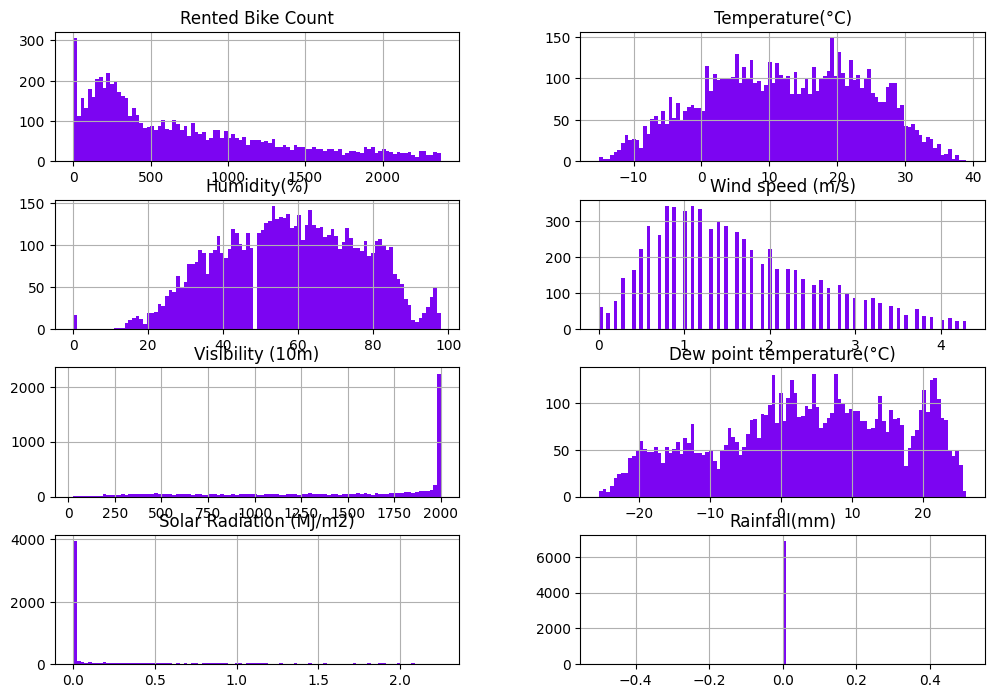

In [ ]:
bike_sharing[columns[1:10]].hist(stacked=False, bins=100, figsize=(12,30), layout=(14,2), color = '#7C05F2')

In [ ]:
# L·∫•y ra d·ªØ li·ªáu numeric ƒë·ªÉ th·ª±c hi·ªán normalize:
X=bike_sharing.iloc[:,2:11]
y=bike_sharing.iloc[:,1]

# Chia d·ªØ li·ªáu th√†nh t·∫≠p train v√† test ban ƒë·∫ßu
X_train1, X_test, y_train1, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

V·ªõi c√°c bi·ªÉu ƒë·ªì ·ªü tr√™n, nh√≥m quy·∫øt ƒë·ªãnh chu·∫©n ho√° b·∫±ng ph∆∞∆°ng ph√°p Min-Max. ·ªû ƒë√¢y, nh√≥m t·∫°o function v√† th·ª±c hi·ªán chu·∫©n ho√° v·ªõi c√°c c·ªôt t·ª´ c·ªôt 3 ƒë·∫øn c·ªôt 11.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# t·∫°o b·ªô scaler
scaler = MinMaxScaler()
# fit scaler v√†o data
scaler.fit(X_train1)
# Th·ª±c hi·ªán scale
normalized = scaler.transform(X_train1)
normalized1 = scaler.transform(X_test)

Cu·ªëi c√πng, nh√≥m th·ª±c hi·ªán join c√°c c·ªôt bi·∫øn X ƒë√£ ƒë∆∞·ª£c chu·∫©n h√≥a v√† c√°c c·ªôt bi·∫øn X ƒë√£ s·ª≠ d·ª•ng dummy ·ªü ph·∫ßn Formatting

In [ ]:
X_train2 = X_train1.join(bike_sharing.iloc[:,11:18])


In [ ]:
X_train2

Hour  Temperature(¬∞C)  Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
358    22             -0.1           49               2.0               870   
364     4             -5.0           70               2.7               702   
5186    2             23.6           80               1.5               879   
4083    3             13.5           41               1.0              2000   
3821    5              9.5           65               0.9              2000   
...   ...              ...          ...               ...               ...   
4967   23             27.2           55               0.7               920   
6844    4             18.0           59               1.5              2000   
6888    0             22.1           74               1.1              1962   
7088    8             18.2           86               0.0               858   
1100   20              3.7           58               1.3               474   

      Dew point temperature(¬∞C)  Solar Radiation (MJ/m2)  Rainfall(mm)  \
358                        -9.5                     0.00           0.0   
364                        -9.6                     0.00           0.0   
5186                       19.9                     0.00           0.0   
4083                        0.4                     0.00           0.0   
3821                        3.2                     0.00           0.0   
...                         ...                      ...           ...   
4967                       17.3                     0.00           0.0   
6844                        9.8                     0.00           0.0   
6888                       17.2                     0.00           0.0   
7088                       15.8                     0.48           0.0   
1100                       -3.8                     0.00           0.0   

      Snowfall (cm)  Autumn  Spring  Summer  Winter  No Holiday  NoFunc  Func  
358             0.0       0       0       0       1           1       0     1  
364             0.0       0       0       0       1           1       0     1  
5186            0.0       0       0       1       0           1       0     1  
4083            0.0       0       1       0       0           1       0     1  
3821            0.0       0       1       0       0           1       0     1  
...             ...     ...     ...     ...     ...         ...     ...   ...  
4967            0.0       0       0       1       0           1       0     1  
6844            0.0       1       0       0       0           1       0     1  
6888            0.0       1       0       0       0           1       0     1  
7088            0.0       1       0       0       0           1       0     1  
1100            0.0       0       0       0       1           1       0     1  

[5480 rows x 16 columns]

In [ ]:
X_test1 = X_test.join(bike_sharing.iloc[:,11:18])

In [ ]:
X_test1

Hour  Temperature(¬∞C)  Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
1262   14              3.3           73               0.4               744   
2400    0              5.1           77               1.9               718   
7037    5             19.5           74               1.8              1421   
8018    2              6.4           65               0.0              2000   
2945   17             22.0           49               3.7              1582   
...   ...              ...          ...               ...               ...   
2999   23             10.2           58               2.4              2000   
835    19             -2.7           39               1.4              1616   
4445    5             19.2           56               0.9              1772   
4809    9             22.4           62               0.9               761   
4545    9             21.2           62               1.7              1384   

      Dew point temperature(¬∞C)  Solar Radiation (MJ/m2)  Rainfall(mm)  \
1262                       -1.0                     0.11           0.0   
2400                        1.3                     0.00           0.0   
7037                       14.7                     0.00           0.0   
8018                        0.2                     0.00           0.0   
2945                       10.7                     1.28           0.0   
...                         ...                      ...           ...   
2999                        2.2                     0.00           0.0   
835                       -14.7                     0.00           0.0   
4445                       10.2                     0.00           0.0   
4809                       14.7                     0.93           0.0   
4545                       13.6                     1.45           0.0   

      Snowfall (cm)  Autumn  Spring  Summer  Winter  No Holiday  NoFunc  Func  
1262            0.0       0       0       0       1           1       0     1  
2400            0.0       0       1       0       0           1       0     1  
7037            0.0       1       0       0       0           1       0     1  
8018            0.0       1       0       0       0           1       0     1  
2945            0.0       0       1       0       0           1       0     1  
...             ...     ...     ...     ...     ...         ...     ...   ...  
2999            0.0       0       1       0       0           1       0     1  
835             0.0       0       0       0       1           1       0     1  
4445            0.0       0       0       1       0           1       0     1  
4809            0.0       0       0       1       0           1       0     1  
4545            0.0       0       0       1       0           1       0     1  

[1370 rows x 16 columns]

*T·∫°o 1 dictionary c√≥ value l√† c√°c ch·ªâ s·ªë ƒë·ªÉ so s√°nh c√°c model*

In [ ]:
model_comparison = {}

## **Linear Regression**

In [ ]:
# Chia t·∫≠p train1 th√†nh t·∫≠p train v√† validation
X_train, X_val, y_train, y_val = train_test_split(X_train2, y_train1, test_size=0.25, random_state=42)

In [ ]:
# T·∫°o m√¥ h√¨nh Linear Regression
model0 = LinearRegression()

# Fit m√¥ h√¨nh v√†o t·∫≠p train
model0.fit(X_train, y_train)

y_pred1 = model0.predict(X_val)
print('rmse default', round(math.sqrt(mean_squared_error(y_val, y_pred1)),4))

rmse default 416.9789


In [ ]:
model0.get_params().keys()

dict_keys(['copy_X', 'fit_intercept', 'n_jobs', 'positive'])

- copy_X: If copy_X=True, the input X matrix will be copied before the linear regression model is fit. This can be useful if the input X matrix is large, as it can prevent the model from modifying the original data. However, copying the X matrix can be expensive, so it is not always necessary.
- fit_intercept: If fit_intercept=True, the linear regression model will fit an intercept term. The intercept term is a constant term that is added to the model's predictions. This can be useful if the data has a mean that is not zero. However, fitting an intercept term can make the model more sensitive to noise in the data.
- n_jobs: The n_jobs parameter specifies the number of jobs to use for the computation. If n_jobs=1, the computation will be performed on a single core. If n_jobs=-1, all available CPUs will be used for the computation. Using more jobs can improve performance, but it can also increase the memory usage.
- positive: If positive=True, the coefficients of the linear regression model will be constrained to be positive. This can be useful for some applications, such as portfolio optimization. However, it can also make the model less flexible.

- Nh√≥m s·ª≠ d·ª•ng GridSearchCV ƒë·ªÉ th·ª±c hi·ªán Grid Search v·ªõi cross-validation. ƒê·∫ßu ti√™n, nh√≥m ƒë·ªãnh nghƒ©a m√¥ h√¨nh Linear Regression (model1) v√† ƒë·ªãnh nghƒ©a m·ªôt grid (param_grid) v·ªõi c√°c gi√° tr·ªã si√™u tham s·ªë c·∫ßn t√¨m. Trong tr∆∞·ªùng h·ª£p n√†y, ch√∫ng ta t√¨m c√°c gi√° tr·ªã fit_intercept (True/False).

- Sau ƒë√≥, nh√≥m t·∫°o m·ªôt ƒë·ªëi t∆∞·ª£ng GridSearchCV v·ªõi m√¥ h√¨nh, grid v√† c√°c th√¥ng s·ªë kh√°c nh∆∞ s·ªë l∆∞·ª£ng fold trong cross-validation (cv) v√† ph∆∞∆°ng th·ª©c ƒë√°nh gi√° (scoring). Ti·∫øp theo, nh√≥m g·ªçi ph∆∞∆°ng th·ª©c fit tr√™n GridSearchCV ƒë·ªÉ th·ª±c hi·ªán t√¨m ki·∫øm si√™u tham s·ªë t·ªët nh·∫•t.

- Ti·∫øp t·ª•c, nh√≥m in ra si√™u tham s·ªë t·ªët nh·∫•t (best_params_) v√† ƒëi·ªÉm RMSE t·ªët nh·∫•t (best_score_).

In [ ]:
# ƒê·ªãnh nghƒ©a grid search v·ªõi c√°c gi√° tr·ªã si√™u tham s·ªë c·∫ßn t√¨m
param_grid = {'fit_intercept': [True, False]}

# Th·ª±c hi·ªán grid search v·ªõi cross-validation tr√™n t·∫≠p train
grid_search = GridSearchCV(model0, param_grid, cv=5, scoring='neg_root_mean_squared_error')
grid_search.fit(X_train, y_train)

# In si√™u tham s·ªë t·ªët nh·∫•t
print("Best Parameters:", grid_search.best_params_)

# In ƒëi·ªÉm RMSE t·ªët nh·∫•t
print("Best RMSE Score:", abs(grid_search.best_score_.round(4)))

Best Parameters: {'fit_intercept': True}
Best RMSE Score: 387.4068


·ªû ƒë√¢y, ch√∫ng ta th·∫•y "Best Parameters: {'fit_intercept': False}", si√™u tham s·ªë t·ªët nh·∫•t cho m√¥ h√¨nh Linear Regression l√† fit_intercept=False. ƒêi·ªÅu n√†y c√≥ nghƒ©a l√† m√¥ h√¨nh ƒë∆∞·ª£c ƒë√†o t·∫°o kh√¥ng c·∫ßn h·ªçc h·ªá s·ªë ƒëi·ªÅu ch·ªânh v√† gi·∫£ ƒë·ªãnh r·∫±ng ƒë∆∞·ªùng h·ªìi quy ƒëi qua g·ªëc t·ªça ƒë·ªô.

**Ti·∫øp theo**, sau khi t√¨m th·∫•y si√™u tham s·ªë t·ªët nh·∫•t t·ª´ Grid Search (c·ª• th·ªÉ ·ªü ƒë√¢y: fit_intercept=False), ch√∫ng ta t·∫°o m√¥ h√¨nh Linear Regression v·ªõi gi√° tr·ªã si√™u tham s·ªë ƒë√≥ b·∫±ng c√°ch truy·ªÅn n√≥ v√†o khi kh·ªüi t·∫°o m√¥ h√¨nh (LinearRegression(fit_intercept=False)).

Sau ƒë√≥, ch√∫ng ta s·ª≠ d·ª•ng ph∆∞∆°ng th·ª©c fit() ƒë·ªÉ fit l·∫°i m√¥ h√¨nh v√†o t·∫≠p hu·∫•n luy·ªán (X_train v√† y_train).

In [ ]:
# T·∫°o m√¥ h√¨nh Linear Regression v·ªõi si√™u tham s·ªë t·ªët nh·∫•t
model1 = LinearRegression(fit_intercept=False)

# Fit m√¥ h√¨nh v√†o t·∫≠p hu·∫•n luy·ªán
model1.fit(X_train, y_train)

LinearRegression(fit_intercept=False)

**Cu·ªëi c√πng**, ch√∫ng ta ƒë√°nh gi√° m√¥ h√¨nh tr√™n t·∫≠p validation b·∫±ng c√°ch t√≠nh to√°n Mean Squared Error (mean_squared_error).

In [ ]:
# ƒê√°nh gi√° tr√™n t·∫≠p validation
y_val_pred = model1.predict(X_val)
val_rmse = round(np.sqrt(mean_squared_error(y_val, y_val_pred)), 4)
val_r2 = r2_score(y_val,y_val_pred)
print("Root Mean Squared Error on validation set:", val_rmse)
print('RMSE on validation set:', val_r2)

model_comparison['Linear Regression']=[val_rmse, val_r2]

Root Mean Squared Error on validation set: 416.9789
RMSE on validation set: 0.5633133503835859


## **Polynomial Regression**

Ch√∫ng ta s·ª≠ d·ª•ng h√†m PolynomialFeatures t·ª´ module scikit-learn ƒë·ªÉ chuy·ªÉn ƒë·ªïi ƒë·∫ßu v√†o X_train th√†nh ma tr·∫≠n ƒëa th·ª©c X_poly_train. T∆∞∆°ng t·ª± v·ªõi t·∫≠p validation. B·∫≠c c·ªßa ƒëa th·ª©c ƒë∆∞·ª£c x√°c ƒë·ªãnh b·ªüi bi·∫øn degree. Sau ƒë√≥, ch√∫ng ta kh·ªüi t·∫°o m√¥ h√¨nh LinearRegression v√† s·ª≠ d·ª•ng ph∆∞∆°ng th·ª©c fit ƒë·ªÉ ph√π h·ª£p v·ªõi d·ªØ li·ªáu X_poly v√† y. M√¥ h√¨nh Polynomial Regression ƒë√£ ƒë∆∞·ª£c kh·ªüi t·∫°o v√† ph√π h·ª£p v·ªõi d·ªØ li·ªáu.

In [ ]:
# Kh·ªüi t·∫°o m√¥ h√¨nh Polynomial Regression
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train, y_train)
X_val_poly = poly_features.transform(X_val)

# Ph√π h·ª£p v·ªõi m√¥ h√¨nh Polynomial Regression
model2 = LinearRegression()
model2.fit(X_train_poly, y_train)

LinearRegression()

**T∆∞∆°ng t·ª± nh∆∞ model Linear Regression**, nh√≥m 5 s·ª≠ d·ª•ng GridSearchCV ƒë·ªÉ t√¨m ra si√™u tham s·ªë, sau ƒë√≥, nh√≥m in ra si√™u tham s·ªë t·ªët nh·∫•t (best_params_) v√† ƒëi·ªÉm R^2 t·ªët nh·∫•t (best_score_)

In [ ]:
# Th·ª±c hi·ªán grid search v·ªõi cross-validation tr√™n t·∫≠p train
grid_search = GridSearchCV(model2, param_grid, cv=5, scoring='neg_root_mean_squared_error')
grid_search.fit(X_train, y_train)

# In si√™u tham s·ªë t·ªët nh·∫•t
print("Best Parameters:", grid_search.best_params_)

# In ƒëi·ªÉm RMSE t·ªët nh·∫•t
print("Best RMSE Score:", abs(grid_search.best_score_.round(4)))

Best Parameters: {'fit_intercept': True}
Best RMSE Score: 387.4068


**Ti·∫øp theo**, sau khi t√¨m th·∫•y si√™u tham s·ªë t·ªët nh·∫•t t·ª´ Grid Search (c·ª• th·ªÉ ·ªü ƒë√¢y: fit_intercept=False), ch√∫ng ta t·∫°o m√¥ h√¨nh Linear Regression v·ªõi gi√° tr·ªã si√™u tham s·ªë ƒë√≥ b·∫±ng c√°ch truy·ªÅn n√≥ v√†o khi kh·ªüi t·∫°o m√¥ h√¨nh (LinearRegression(fit_intercept=False)).

In [ ]:
# T·∫°o m√¥ h√¨nh Linear Regression v·ªõi si√™u tham s·ªë t·ªët nh·∫•t
model3 = LinearRegression(fit_intercept=False)

# Fit m√¥ h√¨nh v√†o t·∫≠p hu·∫•n luy·ªán
model3.fit(X_train_poly, y_train)

LinearRegression(fit_intercept=False)

**Cu·ªëi c√πng**, ch√∫ng ta ƒë√°nh gi√° m√¥ h√¨nh tr√™n t·∫≠p validation b·∫±ng c√°ch t√≠nh to√°n Mean Squared Error (mean_squared_error).

In [ ]:
# ƒê√°nh gi√° tr√™n t·∫≠p validation
y_val_pred = model3.predict(X_val_poly)
val_rmse = round(np.sqrt(mean_squared_error(y_val, y_val_pred)), 4)
val_r2 = r2_score(y_val,y_val_pred)
print("Root Mean Squared Error on validation set:", val_rmse)
print('RMSE on validation set:', val_r2)

model_comparison['Polynomial Regression']=[val_rmse, val_r2]

Root Mean Squared Error on validation set: 345.0531
RMSE on validation set: 0.7009708292036766


## **Decision Tree Regression**




In [ ]:
# kh·ªüi t·∫°o m√¥ h√¨nh decision tree regression
dtr = DecisionTreeRegressor(random_state = 42)
dtr.fit(X_train, y_train)

y_pred2 = dtr.predict(X_val)
print('rmse default', round(math.sqrt(mean_squared_error(y_val, y_pred2)),4))

rmse default 323.1943


In [ ]:
dtr.get_params().keys()

dict_keys(['ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])

- ccp_alpha: A non-negative float that controls the complexity of the decision tree. A higher value will lead to a simpler tree, while a lower value will lead to a more complex tree.
- criterion: A string that specifies the splitting criterion to use. The possible values are "gini" and "entropy".
- max_depth: An integer that specifies the maximum depth of the decision tree. A higher value will lead to a more complex tree, while a lower value will lead to a simpler tree.
- max_features: An integer or float that specifies the maximum number of features to consider when splitting a node. A higher value will lead to a more complex tree, while a lower value will lead to a simpler tree.
- max_leaf_nodes: An integer that specifies the maximum number of leaf nodes in the decision tree. A higher value will lead to a more complex tree, while a lower value will lead to a simpler tree.
- min_impurity_decrease: A non-negative float that specifies the minimum decrease in impurity required to split a node. A higher value will lead to a simpler tree, while a lower value will lead to a more complex tree.
- min_samples_leaf: An integer that specifies the minimum number of samples required in a leaf node. A higher value will lead to a simpler tree, while a lower value will lead to a more complex tree.
- min_samples_split: An integer that specifies the minimum number of samples required to split a node. A higher value will lead to a simpler tree, while a lower value will lead to a more complex tree.
- min_weight_fraction_leaf: A non-negative float that specifies the minimum fraction of the sum of the weights of the samples in a leaf node. A higher value will lead to a simpler tree, while a lower value will lead to a more complex tree.
- random_state: An integer that specifies the random seed to use. This can be used to ensure that the results are reproducible.
- splitter: A string that specifies the splitting algorithm to use. The possible values are "best" and "random".

In [ ]:
# ta·ªç 1 dict v·ªõi key l√† t√™n hyperparam, value l√† c√°c gi√° tr·ªã th·ª≠
params = {"splitter":["best","random"],
          "max_depth" : range(1,15),
          'min_samples_split': range(2, 21),
          "min_samples_leaf":range(1,20),
          "max_features":["auto","log2","sqrt",None],
          'min_weight_fraction_leaf': np.arange(0, 0.6, 0.1),
          "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90],
          'random_state': [42],
          'min_impurity_decrease': np.arange(0,0.1, 0.01)}
# t·∫°o grid search
random_dtr = RandomizedSearchCV(dtr, params,n_iter = 60, scoring='neg_root_mean_squared_error', cv=5, verbose=1)
# fit v√†o model
random_dtr.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
                   n_iter=60,
                   param_distributions={'max_depth': range(1, 15),
                                        'max_features': ['auto', 'log2', 'sqrt',
                                                         None],
                                        'max_leaf_nodes': [None, 10, 20, 30, 40,
                                                           50, 60, 70, 80, 90],
                                        'min_impurity_decrease': array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]),
                                        'min_samples_leaf': range(1, 20),
                                        'min_samples_split': range(2, 21),
                                        'min_weight_fraction_leaf': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5]),
                                        'random_state': [42],
                                        'splitter': ['best', 'random']},
                   scoring='neg_root_mean_squared_error', verbose=1)

In [ ]:
# In hyperparam t·ªët nh·∫•t
print("Best Parameters:", random_dtr.best_params_)

# In ƒëi·ªÉm RMSE t·ªët nh·∫•t
print("Best RMSE Score:", abs(random_dtr.best_score_.round(4)))

Best Parameters: {'splitter': 'best', 'random_state': 42, 'min_weight_fraction_leaf': 0.0, 'min_samples_split': 9, 'min_samples_leaf': 1, 'min_impurity_decrease': 0.06, 'max_leaf_nodes': None, 'max_features': 'auto', 'max_depth': 12}
Best RMSE Score: 288.6282


In [ ]:
# Train l·∫°i v·ªõi t·∫≠p train v√† ƒë√°nh gi√° tr√™n t·∫≠p validation
tuned_dtr = DecisionTreeRegressor(splitter= 'best', random_state = 42, min_weight_fraction_leaf = 0.0, min_samples_split = 17, min_samples_leaf = 10, min_impurity_decrease = 0.08, max_leaf_nodes = 90, max_features = 'log2', max_depth = 13)
tuned_dtr.fit(X_train, y_train)
tuned_y_pred = tuned_dtr.predict(X_val)

val_rmse = round(math.sqrt(mean_squared_error(y_val, tuned_y_pred)),4)
val_r2 = r2_score(y_val,tuned_y_pred)

print('Root Mean Squared Error on validation set:', val_rmse)
print('RMSE on validation set:', val_r2)

model_comparison['Decision Tree Regressor']=[val_rmse, val_r2]

Root Mean Squared Error on validation set: 302.4833
RMSE on validation set: 0.7702029532127306


## **Random Forest Regressor**

In [ ]:
# kh·ªüi t·∫°o m√¥ h√¨nh
rfr = RandomForestRegressor(random_state=42)
rfr.fit(X_train, y_train)

y_pred3 = rfr.predict(X_val)
print('rmse default', round(math.sqrt(mean_squared_error(y_val, y_pred3)),4))

rmse default 231.0498


In [ ]:
rfr.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

- bootstrap: A boolean that specifies whether to use bootstrapping. If True, then each tree in the forest is trained on a bootstrap sample of the training data. If False, then each tree is trained on the entire training data.
- ccp_alpha: A non-negative float that controls the complexity of the decision trees in the forest. A higher value will lead to simpler trees, while a lower value will lead to more complex trees.
- criterion: A string that specifies the splitting criterion to use. The possible values are "gini" and "entropy".
- max_depth: An integer that specifies the maximum depth of the decision trees in the forest. A higher value will lead to more complex trees, while a lower value will lead to simpler trees.
- max_features: An integer or float that specifies the maximum number of features to consider when splitting a node in a decision tree. A higher value will lead to more complex trees, while a lower value will lead to simpler trees.
- max_leaf_nodes: An integer that specifies the maximum number of leaf nodes in the decision trees in the forest. A higher value will lead to more complex trees, while a lower value will lead to simpler trees.
- max_samples: An integer that specifies the maximum number of samples to use when training each decision tree in the forest. A higher value will lead to more complex trees, while a lower value will lead to simpler trees.
- min_impurity_decrease: A non-negative float that specifies the minimum decrease in impurity required to split a node in a decision tree. A higher value will lead to simpler trees, while a lower value will lead to more complex trees.
- min_samples_leaf: An integer that specifies the minimum number of samples required in a leaf node in a decision tree. A higher value will lead to simpler trees, while a lower value will lead to more complex trees.
- min_samples_split: An integer that specifies the minimum number of samples required to split a node in a decision tree. A higher value will lead to simpler trees, while a lower value will lead to more complex trees.
- min_weight_fraction_leaf: A non-negative float that specifies the minimum fraction of the sum of the weights of the samples in a leaf node. A higher value will lead to simpler trees, while a lower value will lead to more complex trees.
- n_estimators: An integer that specifies the number of decision trees in the forest. A higher value will lead to a more complex model, while a lower value will lead to a simpler model.
- n_jobs: An integer that specifies the number of jobs to use for training the decision trees in parallel. A value of -1 will use all available cores.
oob_score: A boolean that specifies whether to calculate the out-of-bag score. If True, then the out-of-bag score will be calculated and stored in the forest object.
- random_state: An integer that specifies the random seed to use. This can be used to ensure that the results are reproducible.
- verbose: An integer that specifies the verbosity level. A value of 0 will suppress all output, while a value of 1 will print the progress of the algorithm.
- warm_start: A boolean that specifies whether to warm-start the training process. If True, then the previous forest will be used as a starting point for the new forest.

In [ ]:
# t·∫°o grid search ƒë·ªÉ t√¨m hyperparameters t·ªët nh·∫•t
params = {'n_estimators': np.arange(50, 500, 50, dtype=np.int32),
          "max_features": ["auto", "sqrt", "log2"],
          "max_depth": [None] + list(np.arange(5, 50, 5)),
          "min_samples_split": np.arange(2, 20, 2),
          "min_samples_leaf": np.arange(1, 20, 1),
          'ccp_alpha': [0.0, 0.1, 0.5, 1.0],
          'max_leaf_nodes': [None, 5, 10, 15, 20, 25, 30],
          'max_samples': [None, 0.5, 0.8],
          'min_impurity_decrease': np.arange(0, 0.1, 0.01),
          'min_weight_fraction_leaf': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
          'n_jobs': [-1],
          'oob_score': [True, False],
          'random_state': [42],
          'warm_start': [True, False]}
random_rfr = RandomizedSearchCV(rfr, params, n_iter = 60, cv=5, scoring = 'neg_root_mean_squared_error', verbose = 1)
random_rfr.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=60,
                   param_distributions={'ccp_alpha': [0.0, 0.1, 0.5, 1.0],
                                        'max_depth': [None, 5, 10, 15, 20, 25,
                                                      30, 35, 40, 45],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'max_leaf_nodes': [None, 5, 10, 15, 20,
                                                           25, 30],
                                        'max_samples': [None, 0.5, 0.8],
                                        'min_impurity_decrease': array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06...
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'min_weight_fraction_leaf': [0.0, 0.1,
                                                                     0.2, 0.3,
                                                                     0.4, 0.5],
                                        'n_estimators': array([ 50, 100, 150, 200, 250, 300, 350, 400, 450], dtype=int32),
                                        'n_jobs': [-1],
                                        'oob_score': [True, False],
                                        'random_state': [42],
                                        'warm_start': [True, False]},
                   scoring='neg_root_mean_squared_error', verbose=1)

In [ ]:
# In hyperparam t·ªët nh·∫•t
print("Best Parameters:", random_rfr.best_params_)

# In ƒëi·ªÉm RMSE t·ªët nh·∫•t
print("Best RMSE Score:", abs(random_rfr.best_score_.round(4)))

Best Parameters: {'warm_start': True, 'random_state': 42, 'oob_score': True, 'n_jobs': -1, 'n_estimators': 100, 'min_weight_fraction_leaf': 0.0, 'min_samples_split': 16, 'min_samples_leaf': 18, 'min_impurity_decrease': 0.09, 'max_samples': None, 'max_leaf_nodes': 30, 'max_features': 'auto', 'max_depth': 20, 'ccp_alpha': 0.0}
Best RMSE Score: 274.5215


In [ ]:
# Train l·∫°i v·ªõi t·∫≠p train v√† test tr√™n t·∫≠p validation
tuned_rfr = RandomForestRegressor(warm_start = True, random_state = 42, oob_score = True, n_jobs = -1, n_estimators = 350,min_weight_fraction_leaf = 0.0, min_samples_split = 2, min_samples_leaf = 12, min_impurity_decrease = 0.08, max_samples = None, max_leaf_nodes = 25, max_features = 'log2', max_depth = 15, ccp_alpha = 0.1)
tuned_rfr.fit(X_train, y_train)
tuned_y_pred = tuned_rfr.predict(X_val)

val_rmse = round(math.sqrt(mean_squared_error(y_val, tuned_y_pred)),4)
val_r2 = r2_score(y_val,tuned_y_pred)

print('rmse on validation set', val_rmse)
print('r2 on validation set', val_r2)

model_comparison['Random Forest Regressor']=[val_rmse, val_r2]

rmse on validation set 314.568
r2 on validation set 0.7514745933254233


## **Bagging Regressor**
- Bagging: X√¢y d·ª±ng m·ªôt l∆∞·ª£ng l·ªõn c√°c model (th∆∞·ªùng l√† c√πng lo·∫°i) tr√™n nh·ªØng subsamples kh√°c nhau t·ª´ t·∫≠p training dataset (random sample trong 1 dataset ƒë·ªÉ t·∫°o 1 dataset m·ªõi). Nh·ªØng model n√†y s·∫Ω ƒë∆∞·ª£c train ƒë·ªôc l·∫≠p v√† song song v·ªõi nhau nh∆∞ng ƒë·∫ßu ra c·ªßa ch√∫ng s·∫Ω ƒë∆∞·ª£c trung b√¨nh c·ªông ƒë·ªÉ cho ra k·∫øt qu·∫£ cu·ªëi c√πng.

- Nh∆∞ ch√∫ng ta ƒë√£ bi·∫øt th√¨ Random forests l√† m·ªôt t·ªï h·ª£p c·ªßa nhi·ªÅu Decision Tree. V·ªõi k·ªπ thu·∫≠t k·∫øt h·ª£p (Ensemble learning) ·ªü ƒë√¢y, nh√≥m 5 l·∫•y Random Forest Regressor (ƒë√£ ƒë∆∞·ª£c tunning) ·ªü tr√™n l√†m base model cho thu·∫≠t to√°n k·∫øt h·ª£p n model. Nh∆∞ v·∫≠y Bagging Regressor ·ªü ƒë√¢y l√† m·ªôt t·ªï h·ª£p c·ªßa nhi·ªÅu Random Forest Regressor


In [ ]:
# kh·ªüi t·∫°o m√¥ h√¨nh
bgr= BaggingRegressor(tuned_rfr)
bgr.fit(X_train, y_train)
y_pred4 = bgr.predict(X_val)

val_rmse = round(math.sqrt(mean_squared_error(y_val, y_pred4)),4)
val_r2 = r2_score(y_val,y_pred4)

print('rmse default', val_rmse)
print('r2 on validation set', val_r2)

model_comparison['Bagging Regressor']=[val_rmse, val_r2]

rmse default 316.9138
r2 on validation set 0.7477541038579175


## Stacking Regressor
- Stacking hay t√™n ƒë·∫ßy ƒë·ªß l√† Stacked Generalization l√† m·ªôt thu·∫≠t to√°n h·ªçc m√°y thu·ªôc Ensemble Learning. T∆∞∆°ng t·ª± nh∆∞ Bagging v√† Boosting, Stacking c≈©ng k·∫øt h·ª£p c√°c d·ª± ƒëo√°n t·ª´ nhi·ªÅu m√¥ h√¨nh h·ªçc m√°y tr√™n c√πng m·ªôt t·∫≠p d·ªØ li·ªáu.

- Kh√°c v·ªõi Bagging, Stacking s·ª≠ d·ª•ng nhi·ªÅu m√¥ h√¨nh h·ªçc m√°y kh√°c nhau ch·ª© kh√¥ng ch·ªâ l√† Decision Tree hay RandomForest.

- ·ªû ƒë√¢y Stacking Regressor nh√≥m 5 s·ª≠ d·ª•ng l√† t·ªï h·ª£p c·ªßa t·∫•t c·∫£ c√°c m√¥ h√¨nh (ƒë√£ ƒë∆∞·ª£c tunning) ph√≠a tr√™n l√† Linear Regression, Decision Tree Regression, Polynomial Regression, Random Forest Regression v√† Bagging Regression.

In [ ]:
combine = [('linear regression',model1),
            ('decision Tree',tuned_dtr),
            ('random forest',tuned_rfr),
            ('bagging',bgr)]

In [ ]:
str=StackingRegressor(estimators = combine)
str.fit(X_train, y_train)
y_pred5 = str.predict(X_val)

val_rmse = round(math.sqrt(mean_squared_error(y_val, y_pred5)),4)
val_r2 = r2_score(y_val,y_pred5)

print('rmse default', val_rmse)
print('r2 on validation set', val_r2)

model_comparison['Stacking Regressor1']=[val_rmse, val_r2]

rmse default 281.2799
r2 on validation set 0.8012903625317285


In [ ]:
combine2 = [('linear regression',model1),
            ('polynomial regression',model3),
            ('decision Tree',tuned_dtr),
            ('random forest',tuned_rfr),
            ('bagging',bgr)]

In [ ]:
str2=StackingRegressor(estimators = combine2)
str2.fit(X_train, y_train)
y_pred6 = str.predict(X_val)

val_rmse = round(math.sqrt(mean_squared_error(y_val, y_pred6)),4)
val_r2 = r2_score(y_val,y_pred6)

print('rmse default', val_rmse)
print('r2 on validation set', val_r2)

model_comparison['Stacking Regressor2']=[val_rmse, val_r2]

rmse default 281.2799
r2 on validation set 0.8012903625317285


# **Model Comparison**

In [ ]:
#T·∫°o Dataframe l√† b·∫£ng c√°c ch·ªâ s·ªë RMSE c·ªßa t√¢t c·∫£ c√°c m√¥ h√¨nh sau khi ƒë√£ tune
model_com_df=pd.DataFrame(model_comparison).T
model_com_df.columns=['RMSE', 'R2']
model_com_df= model_com_df.sort_values(by='RMSE',ascending=False)
model_com_df.style.background_gradient(cmap='RdPu')

V·∫≠y, d·ª±a theo k·∫øt qu·∫£ tr√™n, ta th·∫•y Stacking regression c√≥ RMSE th·∫•p nh·∫•t v√† R2 cao nh·∫•t. V√¨ v·∫≠y, nh√≥m l·ª±a ch·ªçn m√¥ h√¨nh Stacking Regression.

Ti·∫øp theo, nh√≥m ti·∫øn h√†nh ch·∫°y l·∫°i m√¥ h√¨nh tr√™n t·∫≠p train+validation.

In [ ]:
str.fit(X_train2, y_train1)
y_predtest = str.predict(X_test1)

val_rmse = round(math.sqrt(mean_squared_error(y_test, y_predtest)),4)
val_r2 = r2_score(y_test, y_predtest)

print('rmse on test set', val_rmse)
print('r2 on test set', val_r2)

rmse on test set 277.9203
r2 on test set 0.7887707582363129


# **Conclusion**

K·∫øt lu·∫≠n l·∫°i, nh√≥m ƒë√£ ph√°t tri·ªÉn m√¥ h√¨nh Stacking Regressor ƒë·ªÉ d·ª± ƒëo√°n Rented Bike Count

In [ ]:
import plotly.graph_objects as go
text = "<span style='font-size: 40px; color: fuchsia;'>  <b> „ÅîÊ∏ÖËÅ¥„ÅÑ„Åü„Å†„Åç„ÅÇ„Çä„Åå„Å®„ÅÜ„Åî„Åñ„ÅÑ„Åæ„Åó„Åü„ÄÇ<br> <br> Thank you for listening. </span>"
fig = go.Figure()

# Add a text box to the figure
fig.add_trace(go.Scatter(x=[0], y=[0], mode='text', text=[text], textfont=dict(size=40)))
fig.update_layout(
    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
    width=1200,
    height=400,
    plot_bgcolor='black'
)

# Create an animation frame with scrolling text
frames = []
for i in range(201):
    frame_data = [
        go.Scatter(x=[-i / 100, 1 - i / 100], y=[0, 0], mode='text', text=[text], textfont=dict(size=40, color='fuchsia'))
    ]
    frames.append(go.Frame(data=frame_data))

# Add the frames to the figure
fig.frames = frames

# Add a duplicate frame with the initial position of the text
frames.append(go.Frame(data=[go.Scatter(x=[0, 1], y=[0, 0], mode='text', text=[text], textfont=dict(size=40, color='fuchsia'))]))

# Create an infinite loop animation by specifying the frame sequence
fig.update_layout(
    updatemenus=[
        dict(
            type='buttons',
            buttons=[
                dict(label=' ‚ñ∂', method='animate', args=[None, {'frame': {'duration': 10, 'redraw': False},
                                                                 'fromcurrent': True, 'transition': {'duration': 0},
                                                                 'mode': 'immediate'}]),
                dict(label=' II', method='animate', args=[[None], {'frame': {'duration': 0, 'redraw': False},
                                                                    'mode': 'immediate',
                                                                    'transition': {'duration': 0}}])
            ]
        )
    ],
    sliders=[dict(
        steps=[dict(
            method="animate",
            args=[[i], {"frame": {"duration": 10, "redraw": False}, "mode": "immediate"}],
            label=str(i)
        ) for i in range(len(frames))]
    )]
)
fig.show()
